# Income Prediction Using Census Income Data Set

![img](img.jpeg)

## Problem Statement

Predict whether income exceeds $50K/yr based on census data. Also known as "Adult" dataset.

## Data Collection
dataset: https://archive.ics.uci.edu/ml/datasets/Census+Income

## Attribute Information:

The Census Income dataset has 48,842 entries. Each entry contains the following information about an individual:

- salary (target feature/label): whether or not an individual makes more than $50,000 annually. (<= 50K, >50K)
- age: the age of an individual. (Integer greater than 0)
- workclass: a general term to represent the employment status of an individual. (Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked)
- fnlwgt: this is the number of people the census believes the entry represents. People with similar demographic characteristics should have similar weights. There is one important caveat to remember about this statement. That is that since the CPS sample is actually a collection of 51 state samples, each with its own probability of selection, the statement only applies within state.(Integer greater than 0)
- education: the highest level of education achieved by an individual. (Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.)
education-num: the highest level of education achieved in numerical form. (Integer greater than 0)
- marital-status: marital status of an individual. Married-civ-spouse corresponds to a civilian spouse while Married-AF-spouse is a spouse in the Armed Forces. Married-spouse-absent includes married people living apart because either the husband or wife was employed and living at a considerable distance from home (Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse)
- occupation: the general type of occupation of an individual. (Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces)
relationship: represents what this individual is relative to others. For example an individual could be a Husband. Each entry only has one relationship attribute. (Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried)
- race: Descriptions of an individual’s race. (White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black)
- sex: the biological sex of the individual. (Male, female)
- capital-gain: capital gains for an individual. (Integer greater than or equal to 0)
- capital-loss: capital loss for an individual. (Integer greater than or equal to 0)
- hours-per-week: the hours an individual has reported to work per week. (continuous)
- native-country: country of origin for an individual (United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands)



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report,ConfusionMatrixDisplay, \
                            precision_score, recall_score, f1_score, roc_auc_score,roc_curve,confusion_matrix


from sklearn import metrics 
from sklearn.model_selection import  train_test_split, RepeatedStratifiedKFold, cross_val_score
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer, KNNImputer
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler,RobustScaler
from sklearn.compose import ColumnTransformer
from catboost import CatBoostClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv('../data/adult.csv',names=['age','workclass','fnlwgt','education','education-num','marital-status','occupation','relationship','race','sex','capital-gain','capital-loss','hours-per-week','native-country','salary'])    

# EDA

In [3]:
# Taking a first look
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
df.shape

(32561, 15)

In [5]:
test=pd.read_csv('../data/test.csv',names=['age','workclass','fnlwgt','education','education-num','marital-status','occupation','relationship','race','sex','capital-gain','capital-loss','hours-per-week','native-country','salary'])

In [6]:
test.drop(0,inplace=True)
test.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
1,25,Private,226802.0,11th,7.0,Never-married,Machine-op-inspct,Own-child,Black,Male,0.0,0.0,40.0,United-States,<=50K.
2,38,Private,89814.0,HS-grad,9.0,Married-civ-spouse,Farming-fishing,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K.
3,28,Local-gov,336951.0,Assoc-acdm,12.0,Married-civ-spouse,Protective-serv,Husband,White,Male,0.0,0.0,40.0,United-States,>50K.
4,44,Private,160323.0,Some-college,10.0,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688.0,0.0,40.0,United-States,>50K.
5,18,?,103497.0,Some-college,10.0,Never-married,?,Own-child,White,Female,0.0,0.0,30.0,United-States,<=50K.


In [7]:
df = pd.concat([df,test],ignore_index=True)

In [8]:
#Final shape of data
df.shape

(48842, 15)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             48842 non-null  object 
 1   workclass       48842 non-null  object 
 2   fnlwgt          48842 non-null  float64
 3   education       48842 non-null  object 
 4   education-num   48842 non-null  float64
 5   marital-status  48842 non-null  object 
 6   occupation      48842 non-null  object 
 7   relationship    48842 non-null  object 
 8   race            48842 non-null  object 
 9   sex             48842 non-null  object 
 10  capital-gain    48842 non-null  float64
 11  capital-loss    48842 non-null  float64
 12  hours-per-week  48842 non-null  float64
 13  native-country  48842 non-null  object 
 14  salary          48842 non-null  object 
dtypes: float64(5), object(10)
memory usage: 5.6+ MB


In [10]:
df['age'] = df['age'].astype('int')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             48842 non-null  int64  
 1   workclass       48842 non-null  object 
 2   fnlwgt          48842 non-null  float64
 3   education       48842 non-null  object 
 4   education-num   48842 non-null  float64
 5   marital-status  48842 non-null  object 
 6   occupation      48842 non-null  object 
 7   relationship    48842 non-null  object 
 8   race            48842 non-null  object 
 9   sex             48842 non-null  object 
 10  capital-gain    48842 non-null  float64
 11  capital-loss    48842 non-null  float64
 12  hours-per-week  48842 non-null  float64
 13  native-country  48842 non-null  object 
 14  salary          48842 non-null  object 
dtypes: float64(5), int64(1), object(9)
memory usage: 5.6+ MB


In [11]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
age,48842.0,NaN,NaN,NaN,38.643585,13.71051,17.0,28.0,37.0,48.0,90.0
workclass,48842,9,Private,33906,NaN,NaN,NaN,NaN,NaN,NaN,NaN
fnlwgt,48842.0,NaN,NaN,NaN,189664.134597,105604.025423,12285.0,117550.5,178144.5,237642.0,1490400.0
education,48842,16,HS-grad,15784,NaN,NaN,NaN,NaN,NaN,NaN,NaN
education-num,48842.0,NaN,NaN,NaN,10.078089,2.570973,1.0,9.0,10.0,12.0,16.0
marital-status,48842,7,Married-civ-spouse,22379,NaN,NaN,NaN,NaN,NaN,NaN,NaN
occupation,48842,15,Prof-specialty,6172,NaN,NaN,NaN,NaN,NaN,NaN,NaN
relationship,48842,6,Husband,19716,NaN,NaN,NaN,NaN,NaN,NaN,NaN
race,48842,5,White,41762,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sex,48842,2,Male,32650,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
df.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
salary            0
dtype: int64

#### Report
- Great, No null values. 
- But I can see ? in dataset. I think we can consider them as null.

In [13]:
df.replace(" ?",np.nan,inplace=True)
df.isnull().sum()

age                  0
workclass         2799
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        2809
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     857
salary               0
dtype: int64

In [14]:
df.isnull().sum()/len(df)*100

age               0.000000
workclass         5.730724
fnlwgt            0.000000
education         0.000000
education-num     0.000000
marital-status    0.000000
occupation        5.751198
relationship      0.000000
race              0.000000
sex               0.000000
capital-gain      0.000000
capital-loss      0.000000
hours-per-week    0.000000
native-country    1.754637
salary            0.000000
dtype: float64

In [15]:
df.duplicated().value_counts()

False    48813
True        29
dtype: int64

In [16]:
# Drop Duplicates
df.drop(df[df.duplicated()].index, inplace=True)

In [17]:
df.shape

(48813, 15)

## Target column (salary)

In [18]:
df['salary'].value_counts()

 <=50K     24698
 <=50K.    12430
 >50K       7839
 >50K.      3846
Name: salary, dtype: int64

In [19]:
df['salary'].replace(" <=50K.", " <=50K",inplace=True)
df['salary'].replace(" >50K.", " >50K",inplace=True)

In [20]:
df['salary'].value_counts()

 <=50K    37128
 >50K     11685
Name: salary, dtype: int64

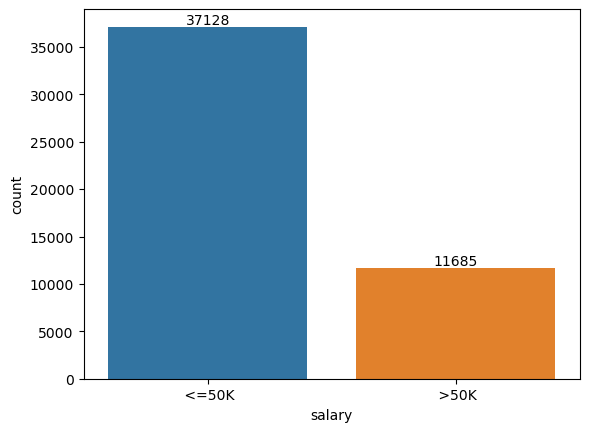

In [21]:
img = sns.countplot(x=df['salary'])
for c in img.containers:
    img.bar_label(c)

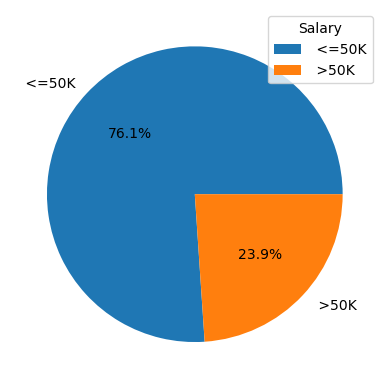

In [22]:
plt.pie(df.salary.value_counts(normalize=True), 
        labels=df.salary.value_counts(normalize=True).index,
        autopct="%.1f%%")
plt.legend(title="Salary")

#### Report 
- We'll try balance data by oversampling using SMOTE

In [23]:
#define numerical & categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']
categorical_features.remove('salary')
# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 6 numerical features : ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']

We have 8 categorical features : ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country']


## Univariant Analysis on numerical features

### Checking on distribution of numeric features

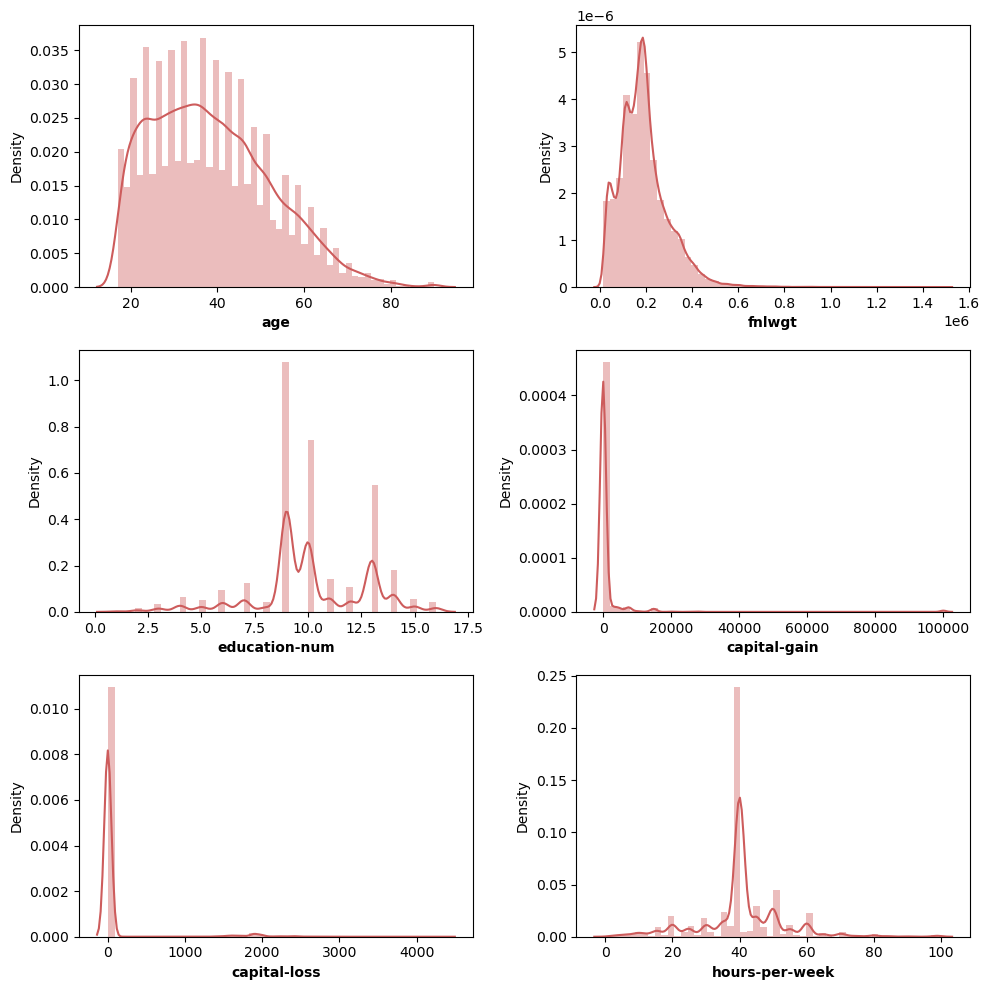

In [24]:
plt.figure(figsize=(10, 10))
for i, col in enumerate(numeric_features):
    plt.subplot(3, 2, i+1)
    sns.distplot(x=df[col], color='indianred')
    plt.xlabel(col, weight='bold')
    plt.tight_layout()

#### Report
- As per the above plot most of the features are not normally distributed.
- Transformation of data is not of prime importance since it is a classification problem.

### Checking outliers on numberic features

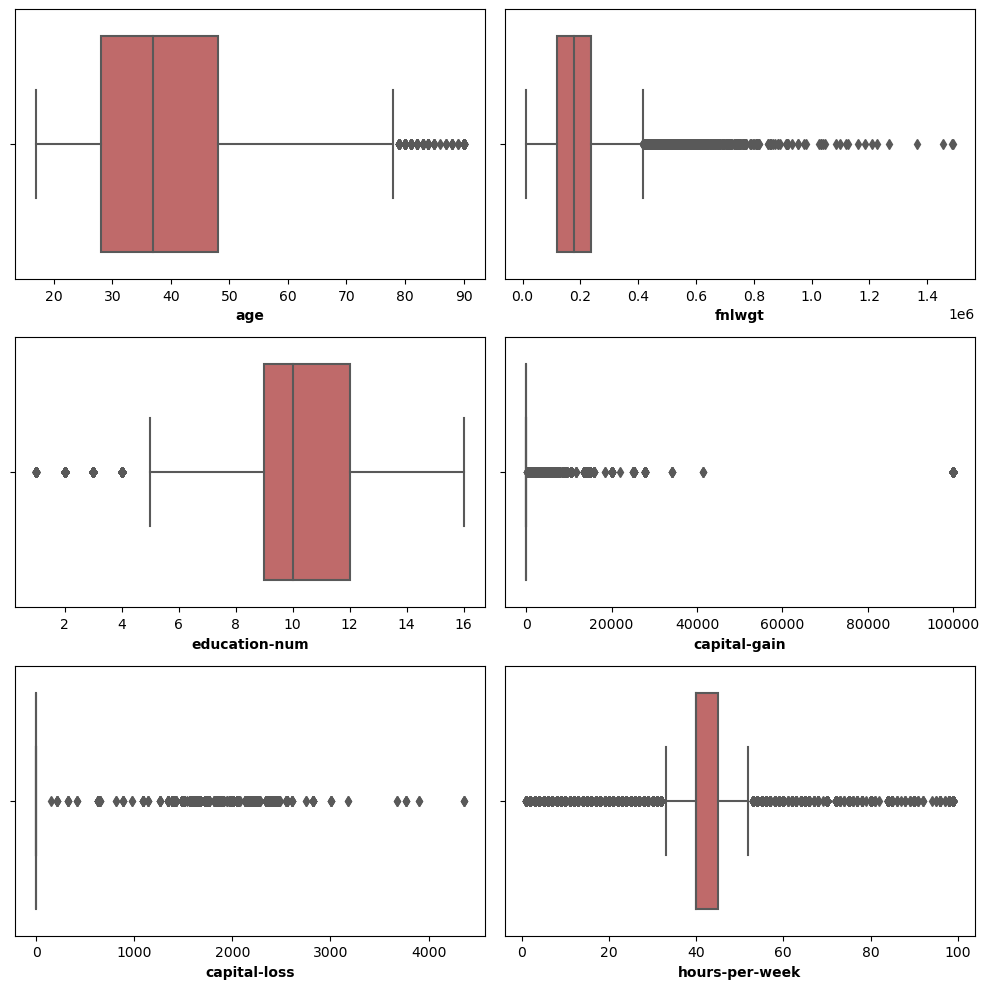

In [25]:
plt.figure(figsize=(10, 10))
for i, col in enumerate(numeric_features):
    plt.subplot(3, 2, i+1)
    sns.boxplot(x=df[col], color='indianred')
    plt.xlabel(col, weight='bold')
    plt.tight_layout()

#### Report
- Lots of outliers in each features.
- We'll try remove outliers by using IQR method.

### Checking correlation

<AxesSubplot:>

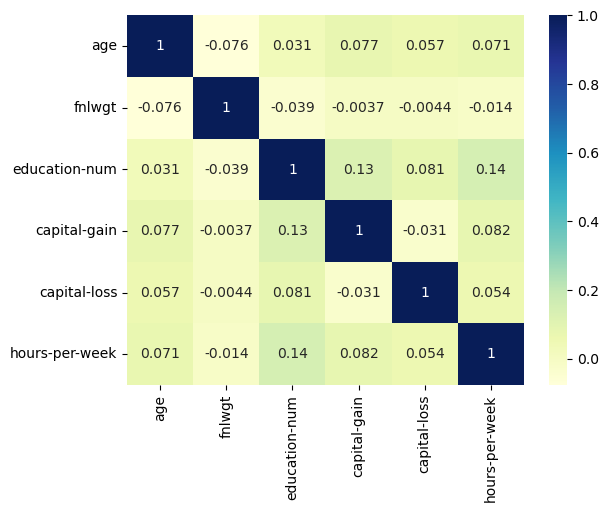

In [26]:
sns.heatmap(df.corr(), annot=True, cmap="YlGnBu")

Report
- No correlation.

### Checking distribution of categorical features

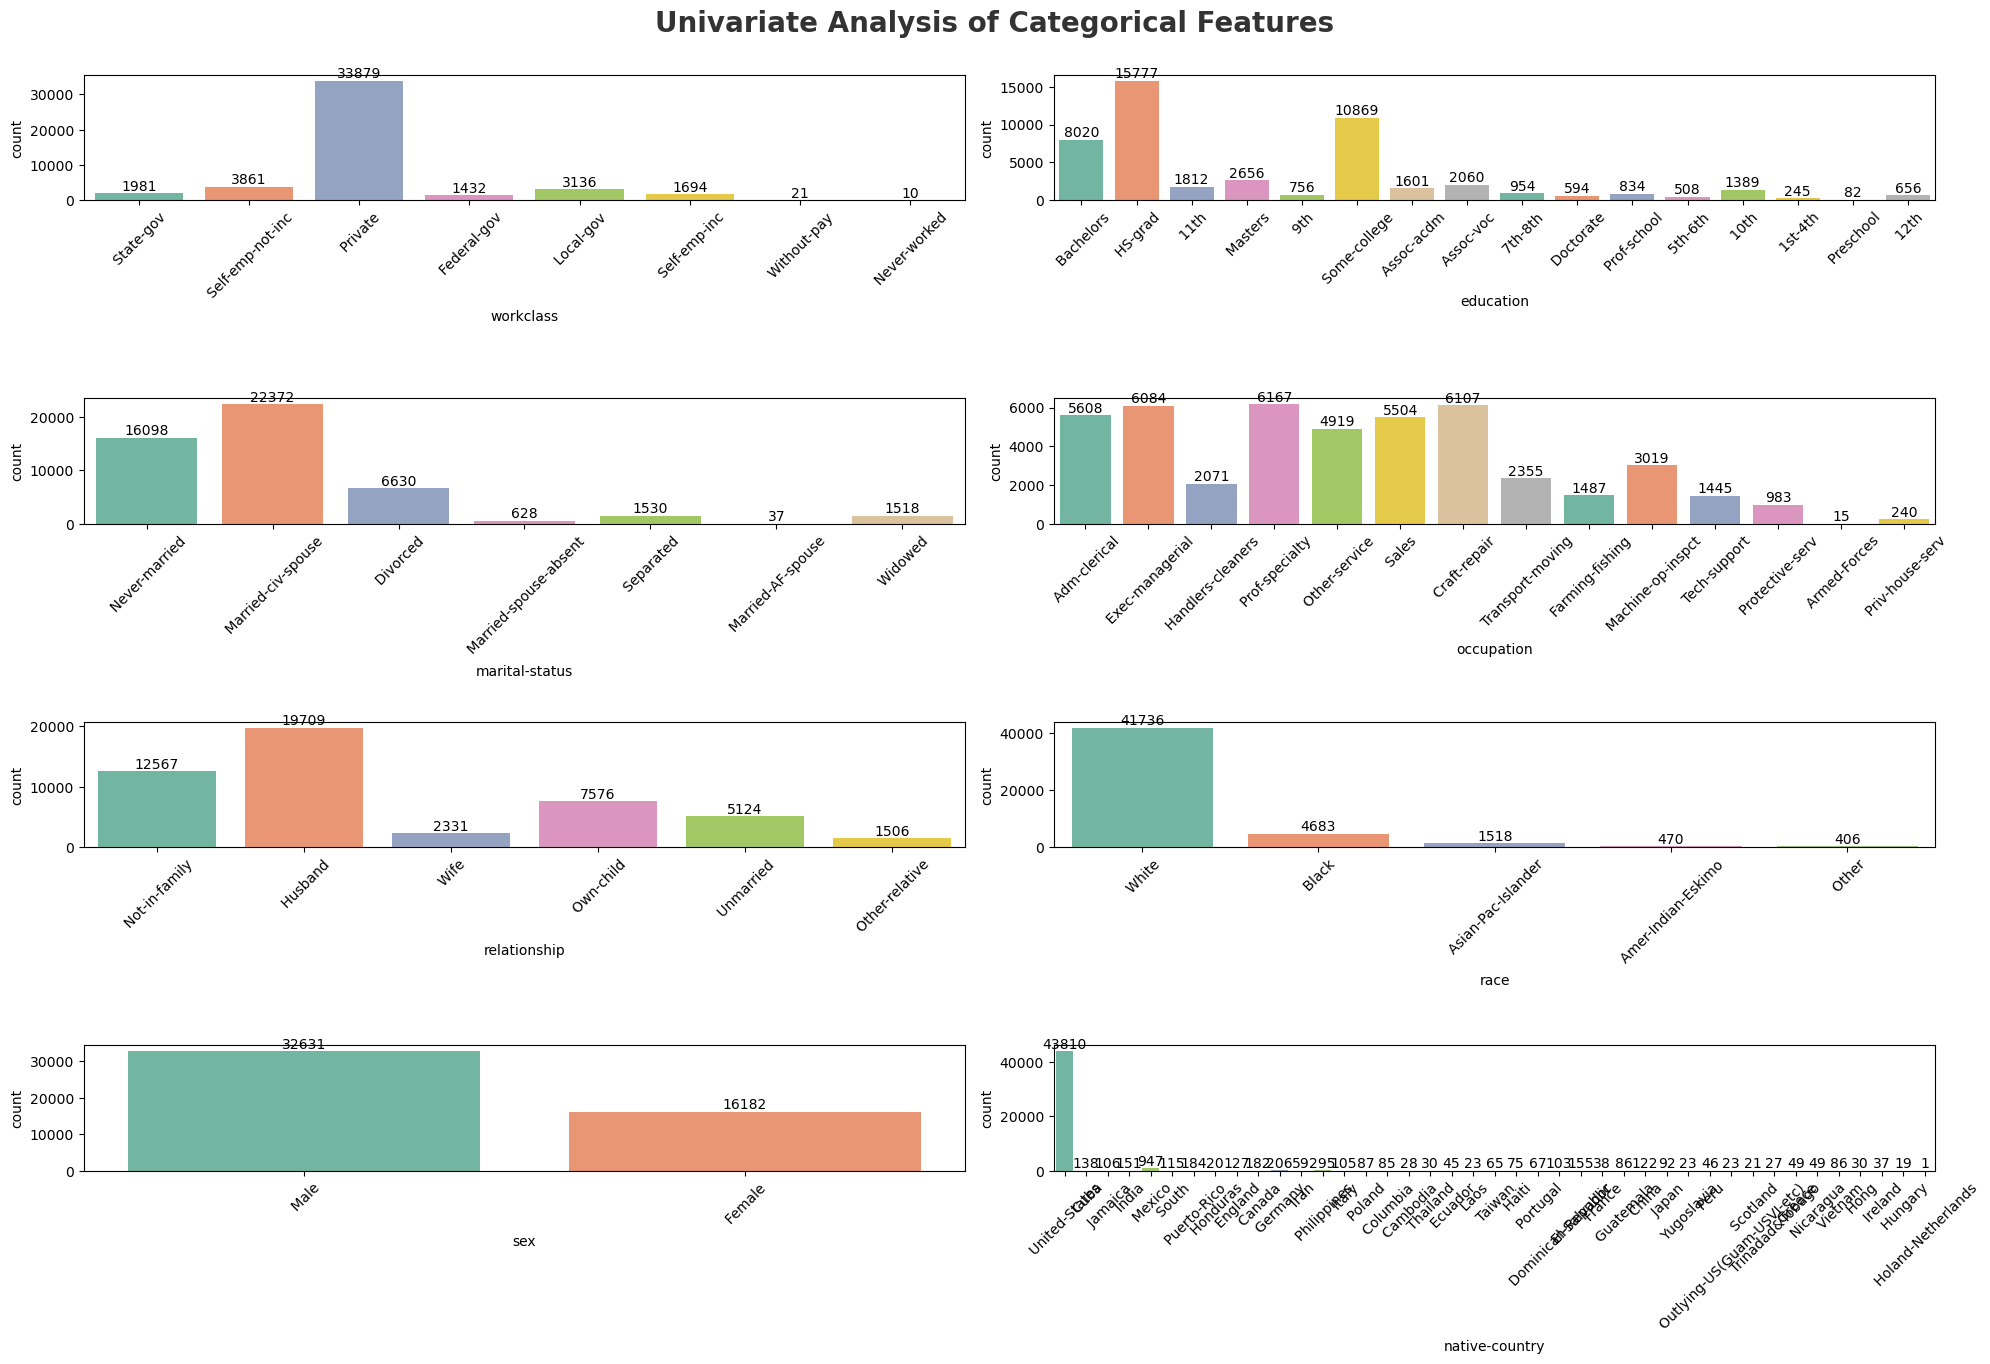

In [27]:
plt.figure(figsize=(20, 15))
plt.suptitle('Univariate Analysis of Categorical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)
category = categorical_features.copy()
for i in range(0, len(category)):
    plt.subplot(5, 2, i+1)
    img = sns.countplot(x=df[category[i]],palette="Set2")
    plt.xlabel(category[i])
    plt.xticks(rotation=45)
    for c in img.containers:
        img.bar_label(c)
    plt.tight_layout() 

#### Report 
- We have majority of people working in private sector.
- Most of them are high school graduate.
- We can see most of them are US native. We'll to divide native - country into US and non-US.
- we can see relationship and marital-status are similar kind of column. Better to drop relationship column.
- We'll try to summarize marital-status into Married and Unmarried.
- We can see education and education-num are similar kind of column. Better to drop education-num column.
- We'll summarize marital status into Single and Married

In [28]:
df["native-country-summary"] = np.where(df["native-country"] == " United-States", "US", "Non-US")

In [29]:
df["native-country-summary"].isna().sum()

0

In [30]:
df['marital-status-summary'] = df['marital-status'].replace(' Never-married','Single')
df['marital-status-summary'] = df['marital-status-summary'].replace(' Married-civ-spouse','Married')
df['marital-status-summary'] = df['marital-status-summary'].replace( ' Divorced','Single')
df['marital-status-summary'] = df['marital-status-summary'].replace(' Married-spouse-absent','Single')
df['marital-status-summary'] = df['marital-status-summary'].replace(' Married-AF-spouse','Married')
df['marital-status-summary'] = df['marital-status-summary'].replace(' Widowed','Single')
df['marital-status-summary'] = df['marital-status-summary'].replace(' Separated','Single')

In [31]:
df['marital-status-summary'].isna().sum()

0

In [32]:
df['marital-status-summary'].unique()

array(['Single', 'Married'], dtype=object)

In [33]:
df['native-country-summary'].unique()

array(['US', 'Non-US'], dtype=object)

## Bivariant Analysis of numerical features

### Checking effect of numerical feature on salary

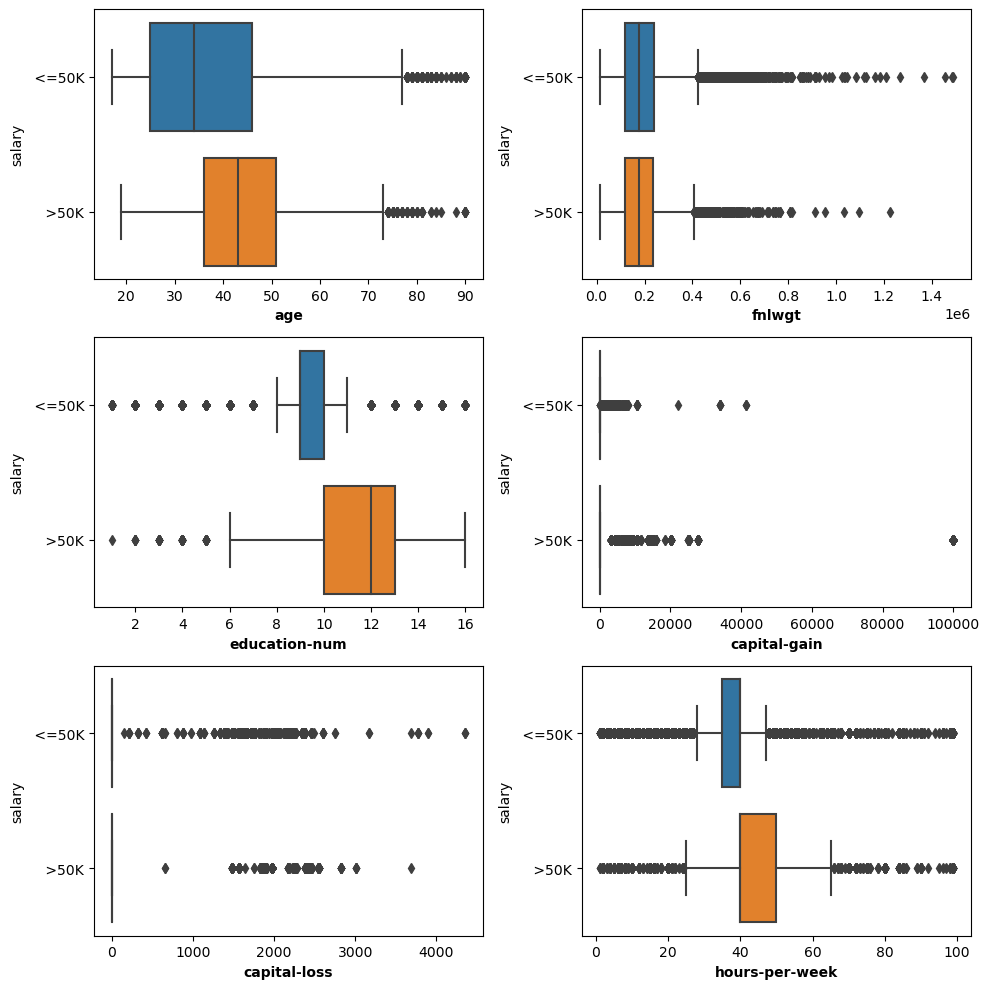

In [34]:
plt.figure(figsize=(10, 10))
for i, col in enumerate(numeric_features):
    plt.subplot(3, 2, i+1)
    sns.boxplot(y=df['salary'],x=df[col])
    plt.xlabel(col, weight='bold')
    plt.tight_layout()

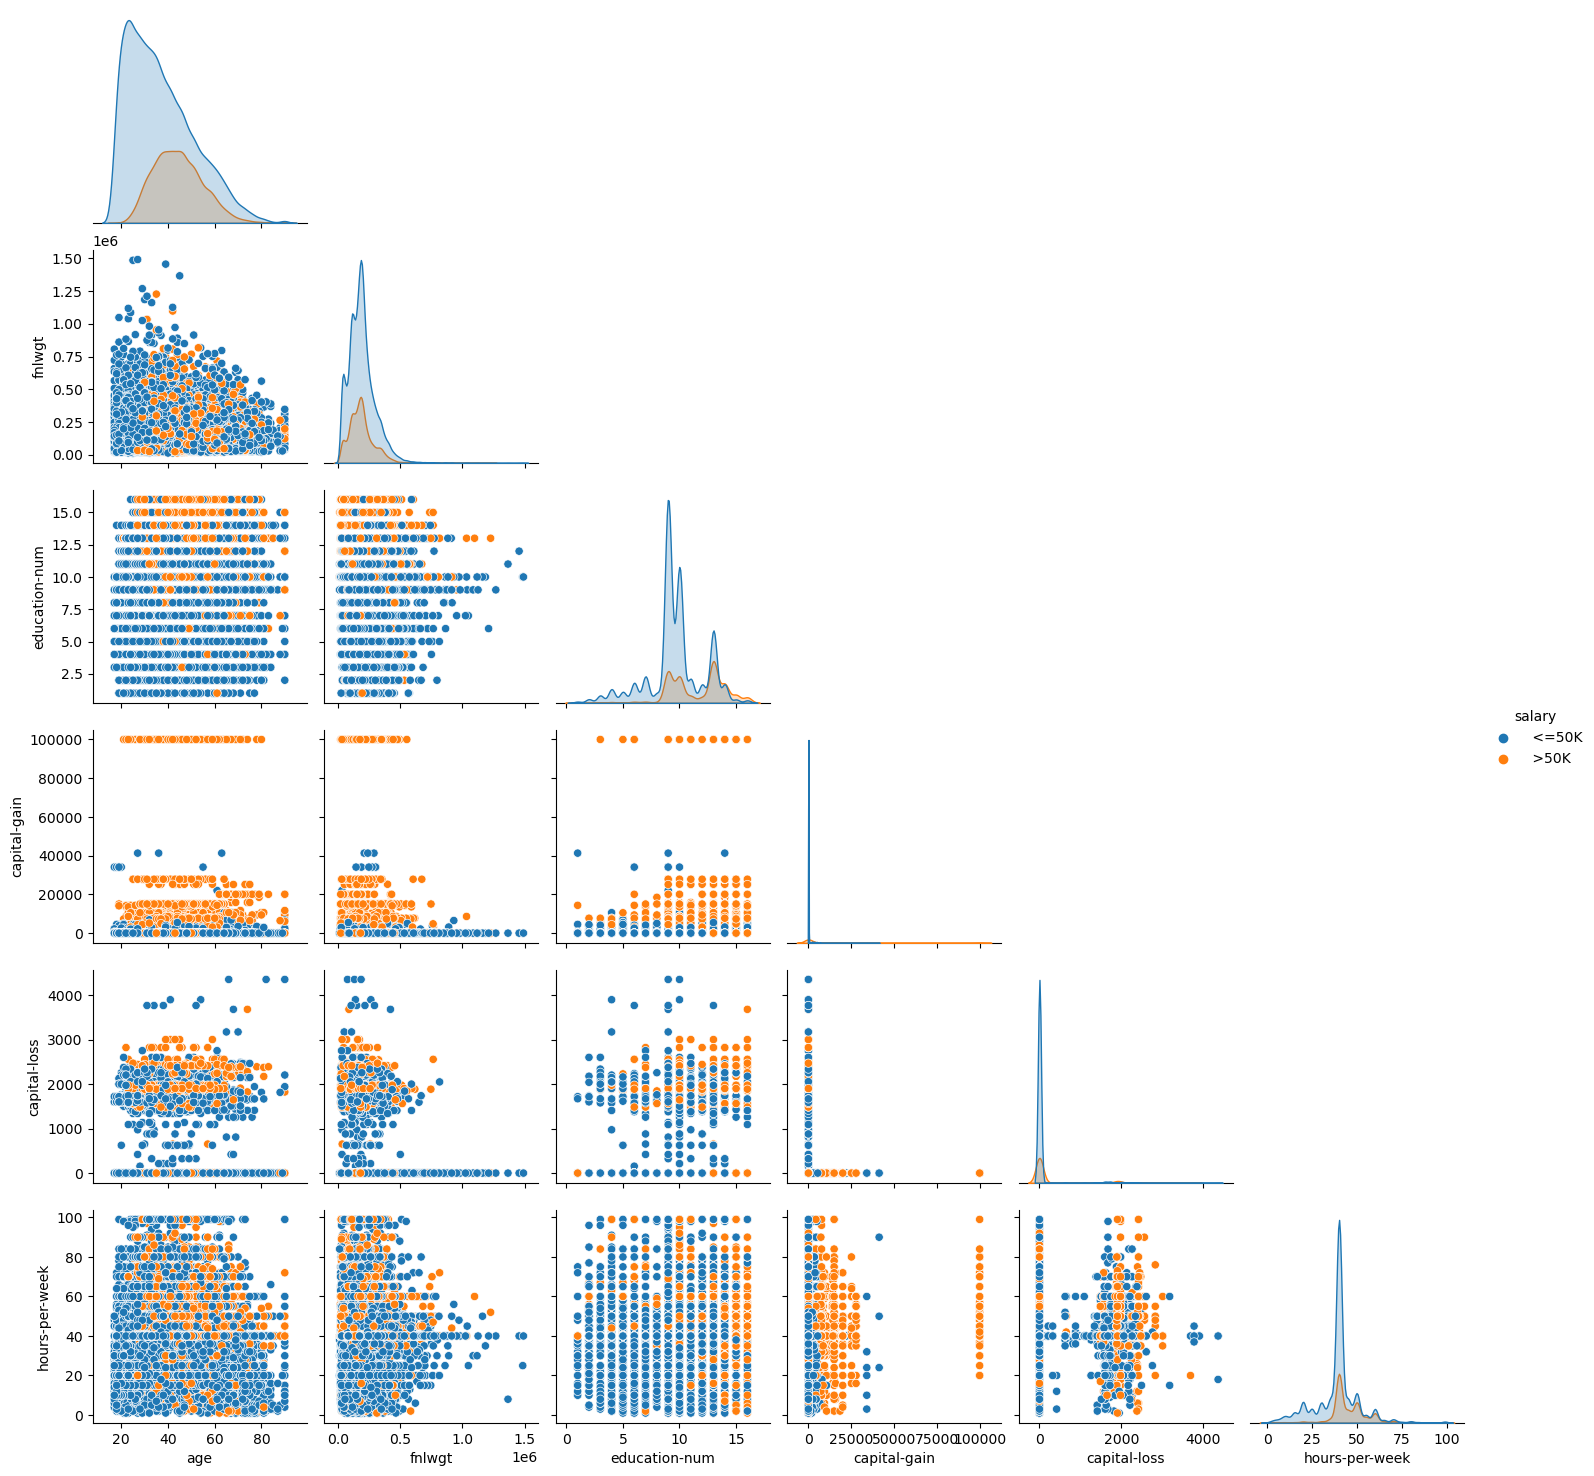

In [35]:
sns.pairplot(df, hue="salary", corner=True)

#### Report
- Older population earns more than younger population.
- No effect of fnlwgt,capital gain and capital loss to salary.
- If your hours-per-week is more then your salary will be more.

## Bivariant Analysis of Categorical features

In [36]:
def analysis(col):
    count = df.groupby(col)["salary"].value_counts(normalize=True)
    count_df = pd.DataFrame(count)
    count_df.rename(columns = {"salary" : "percentage"}, inplace = True)
    count_df.reset_index(inplace = True)
    count_df.sort_values(by = ["salary", col], inplace=True)
    plt.figure(figsize = (50, 50))
    index = 1
    for c in list(count_df[col].unique()):
        plt.subplot(1,len(list(count_df[col].unique())),index)
        count_df.groupby(col)["percentage"].get_group(c).plot.pie(subplots=True,
                                                 labels=list(count_df['salary'].unique()),
                                                 autopct="%.2f%%",
                                                 textprops={'fontsize': 20},
                                                 )
        plt.title(c, fontdict = {'fontsize': 20})
        index += 1

In [37]:
category = ['workclass',
 'education',
 'occupation',
 'race',
 'sex',
 'native-country-summary',
 'marital-status-summary']

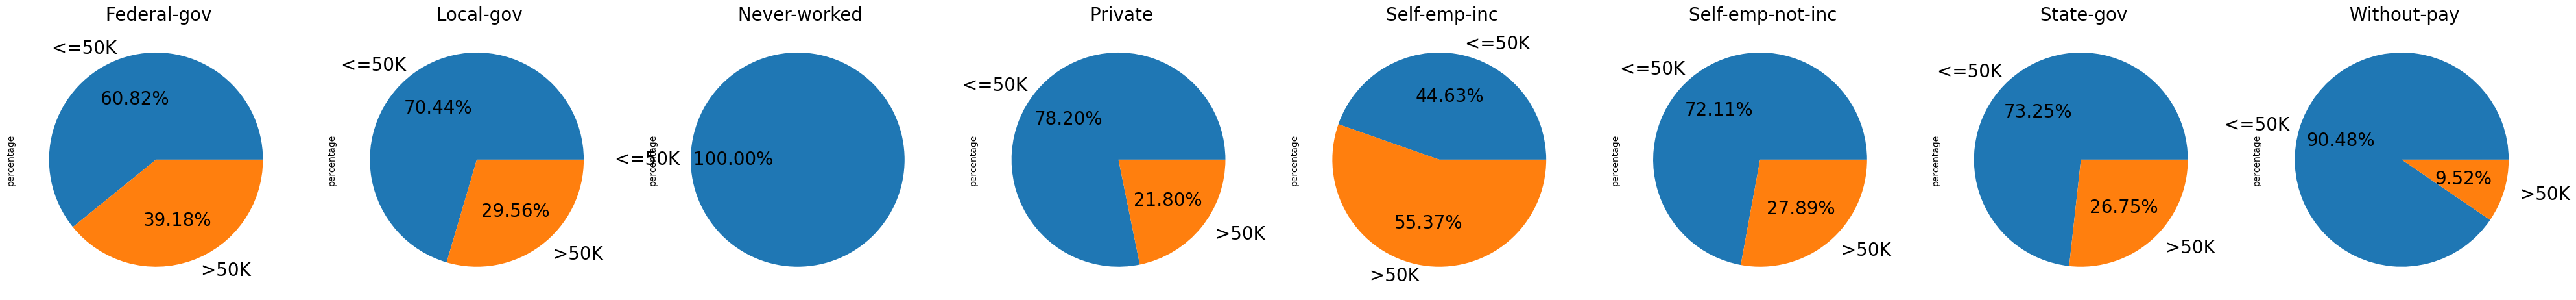

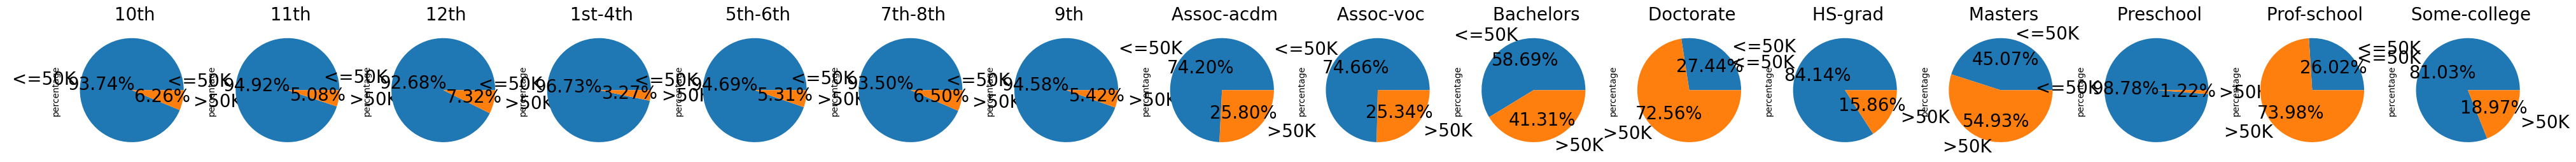

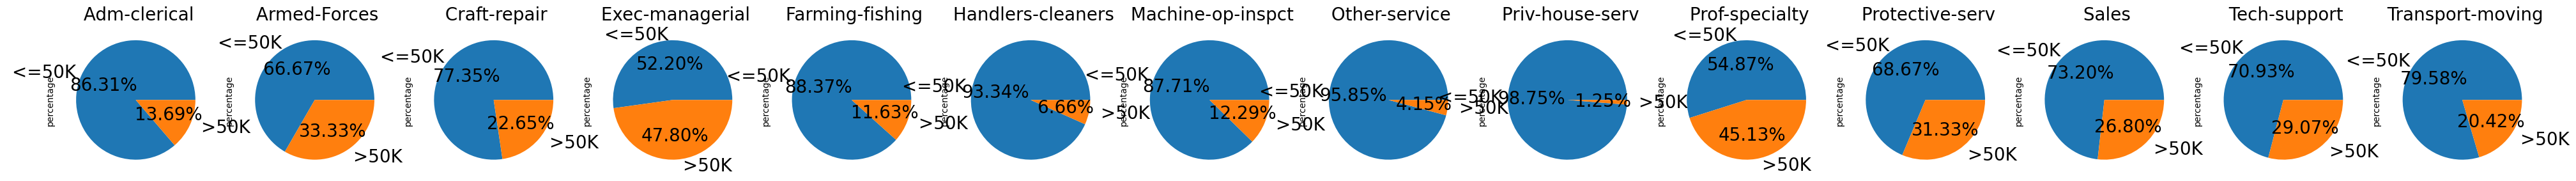

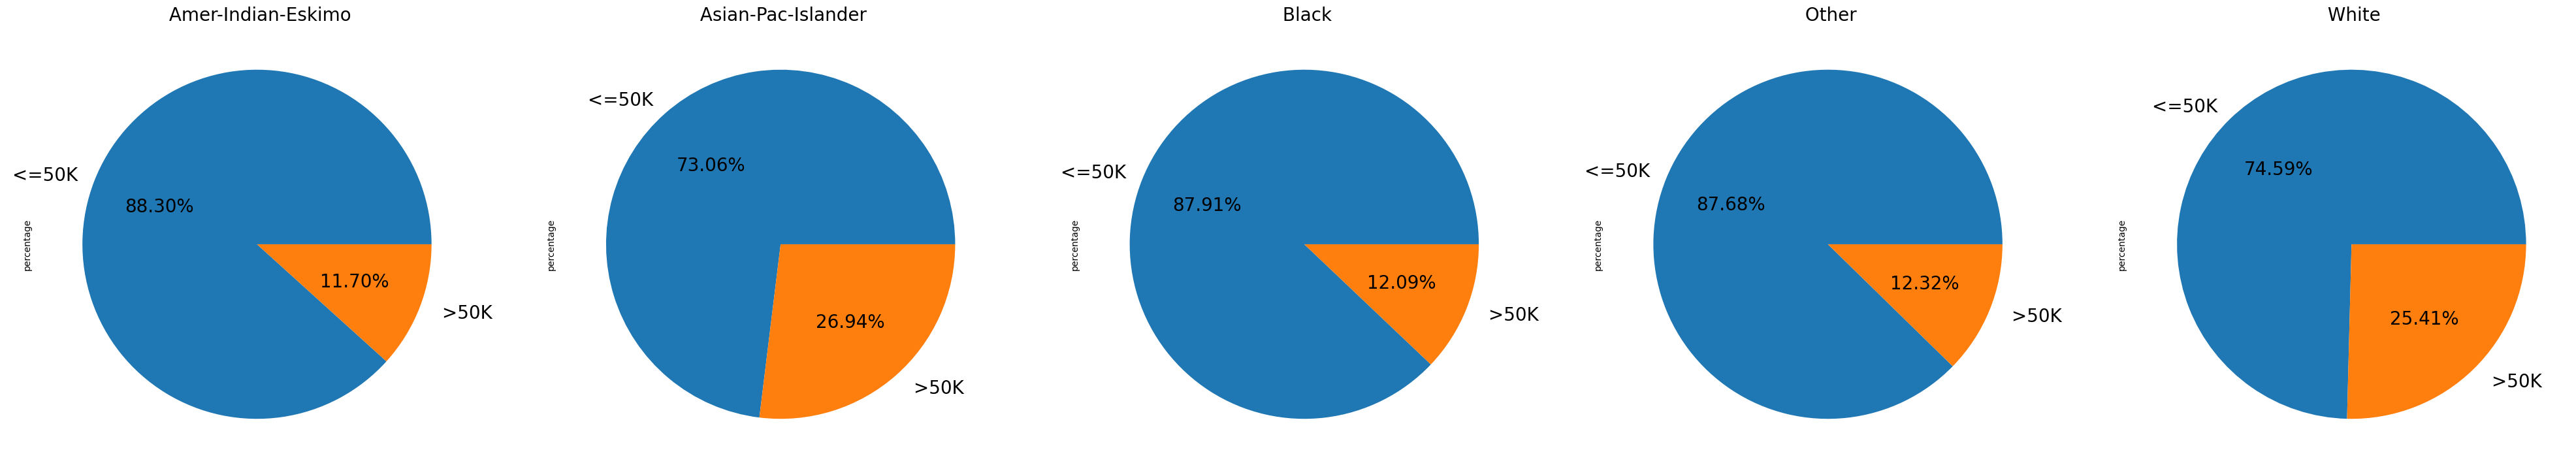

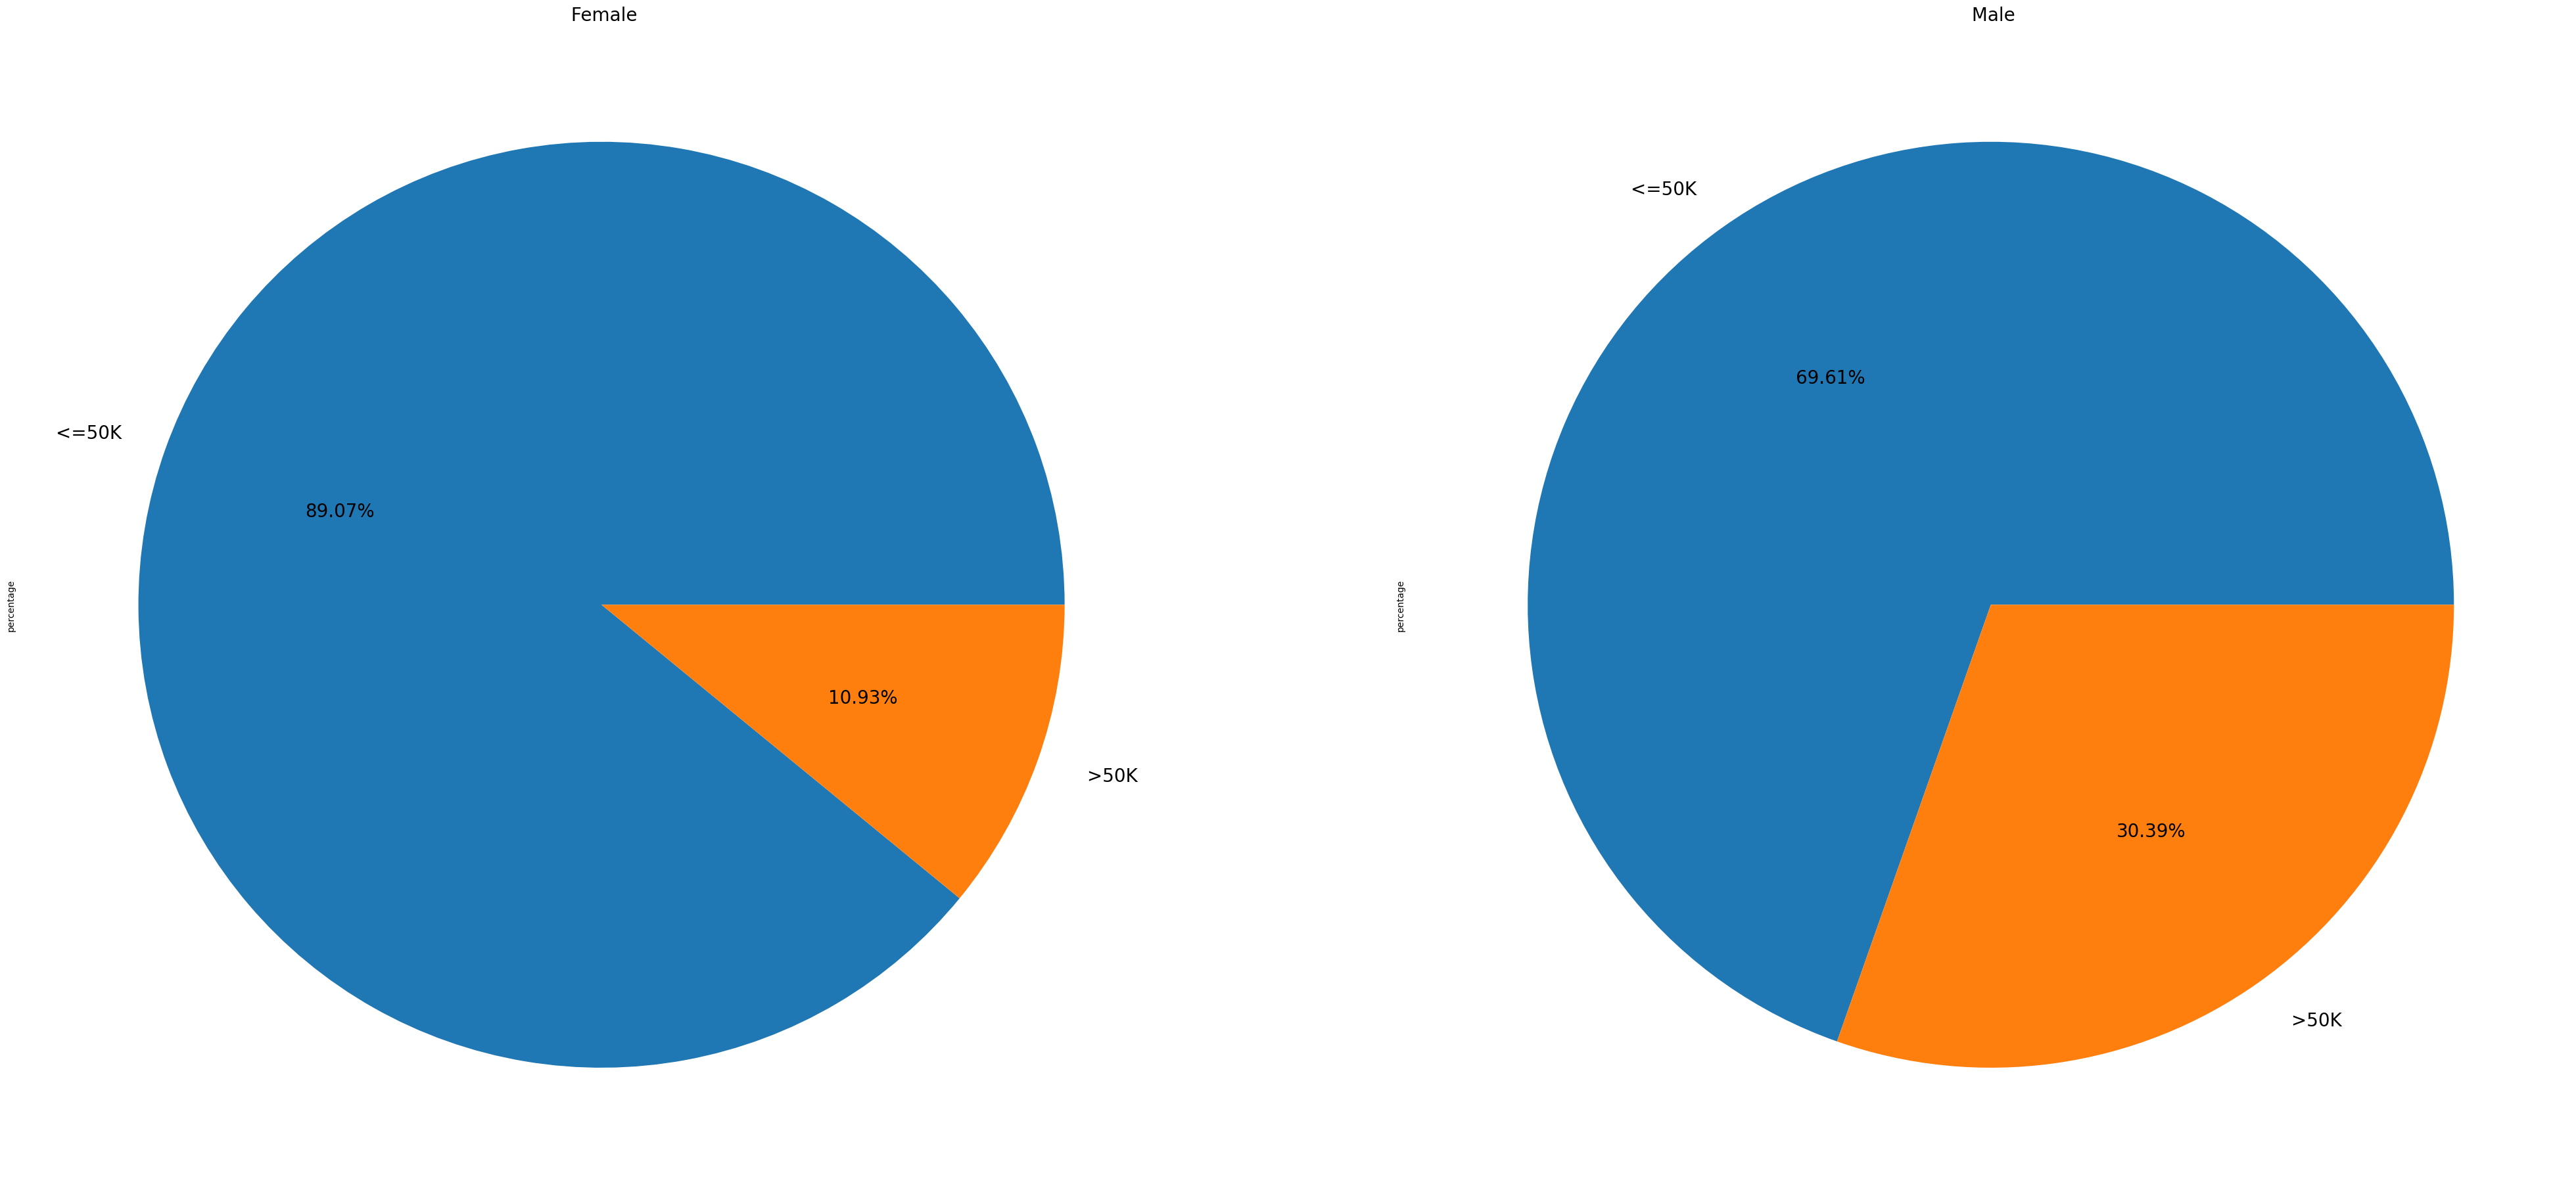

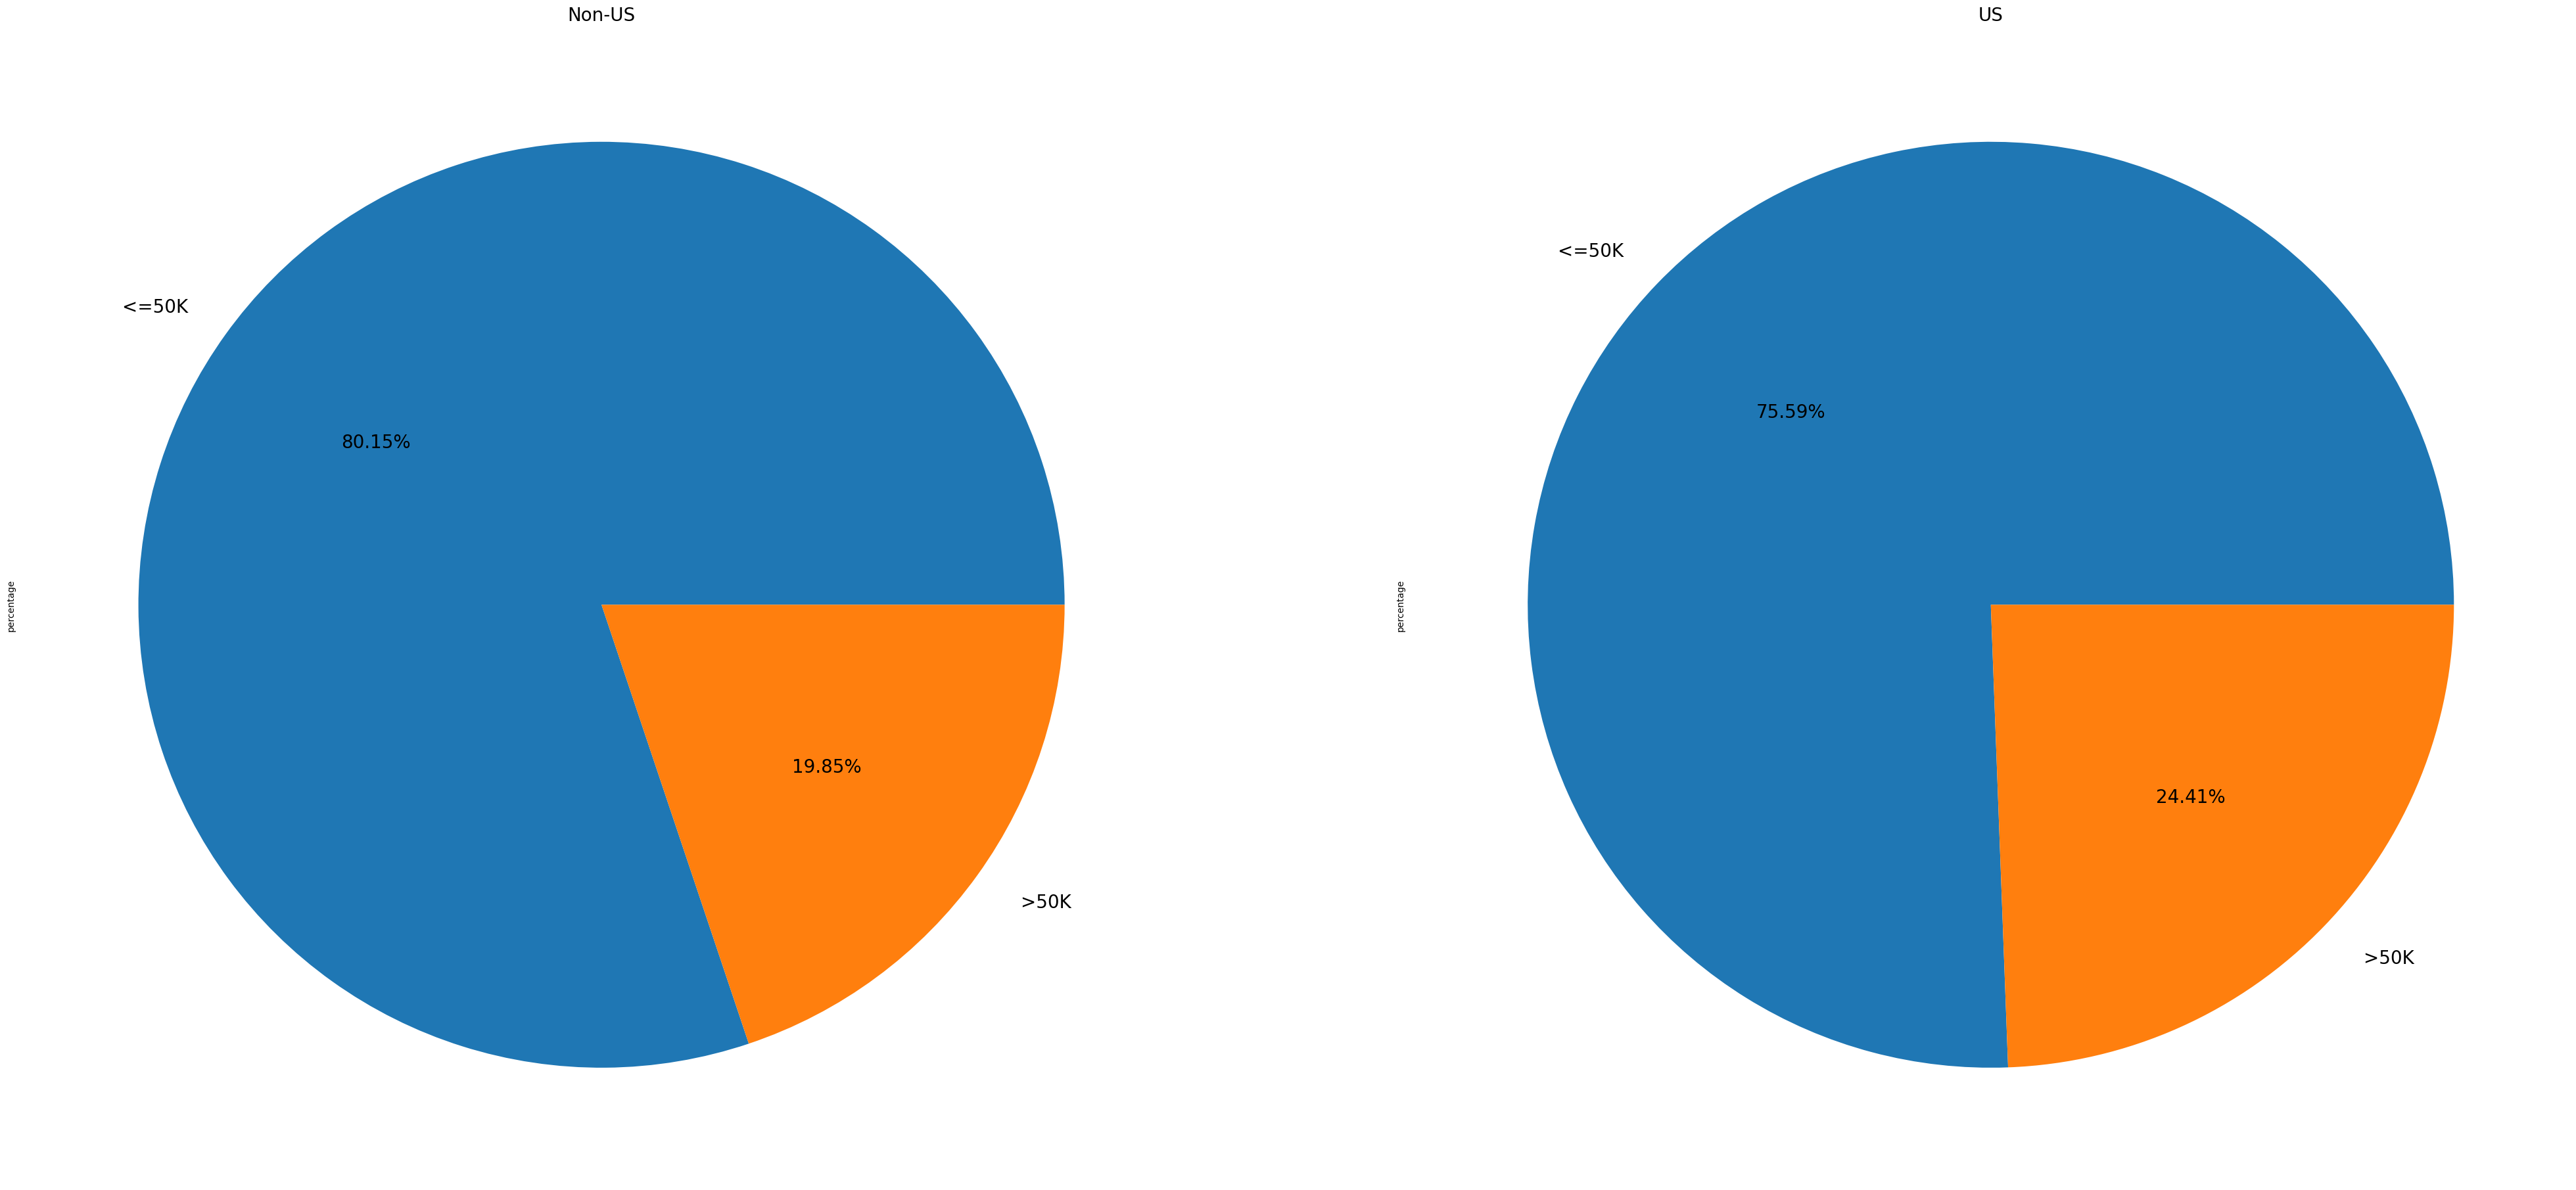

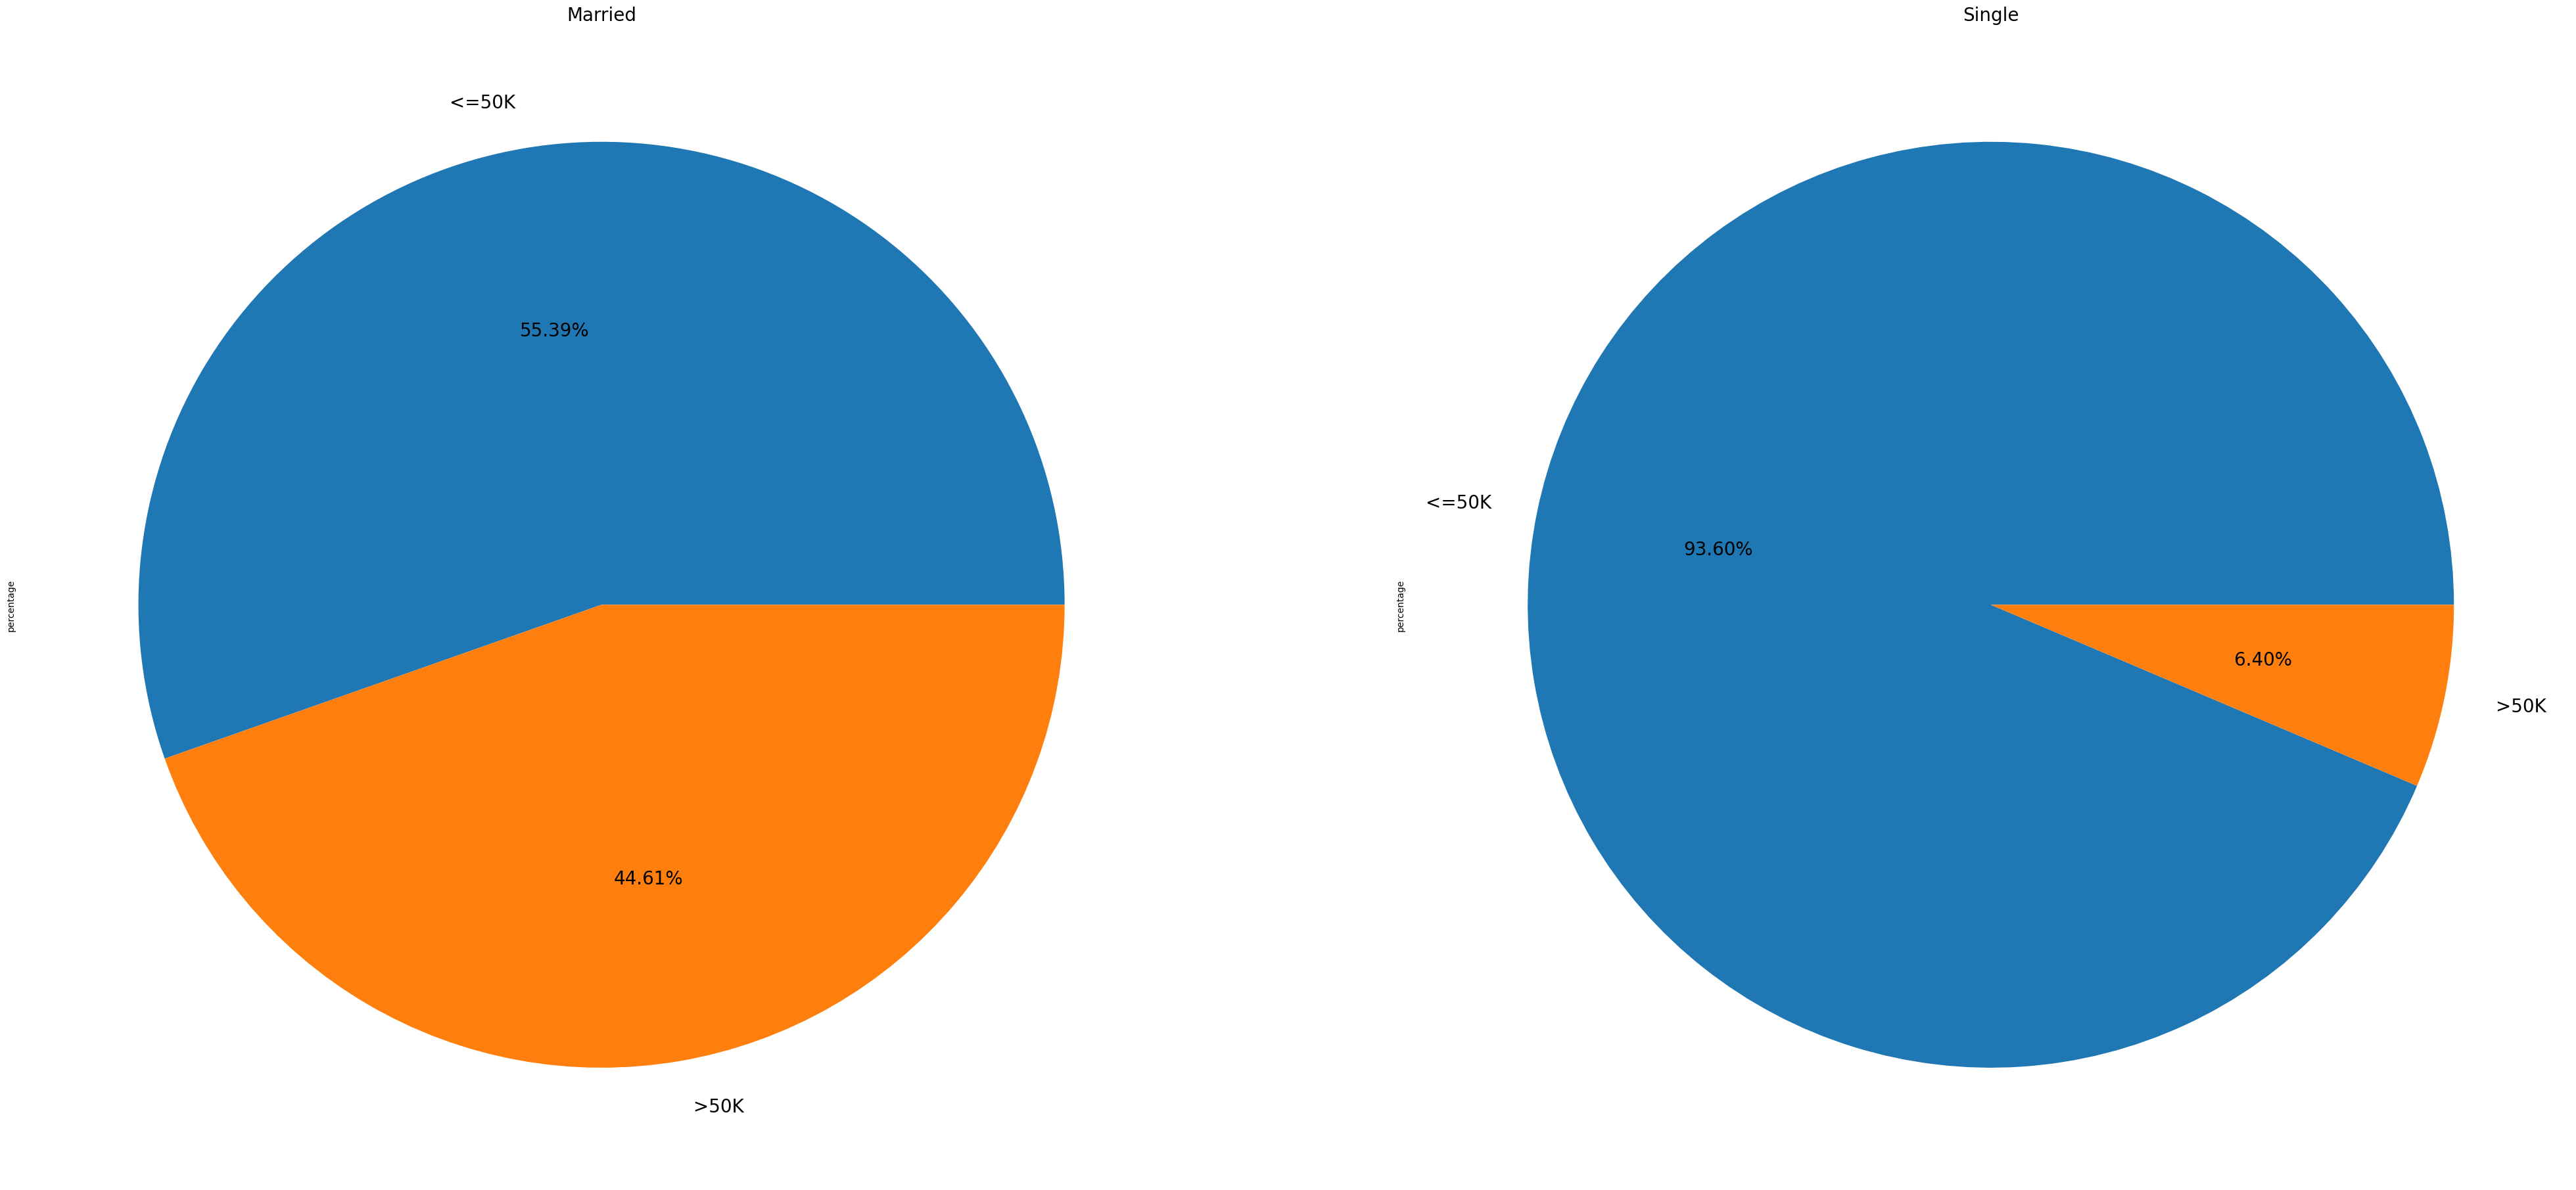

In [38]:
for col in category:
    analysis(col)

#### Report
- If you are self employed then your chances of getting more than 50k salary.
- High Enducation(Doctorate,Master,Prof-school) brings more salary.
- Armed-force and Exec. Manager pay good salary.

### Other Specific Question

#### 1. What is the average age of males and females by income level?

In [39]:
age = df.groupby(["salary", "sex"])[["age"]].mean().reset_index()
age

,salary,sex,age
0,<=50K,Female,36.283980
1,<=50K,Male,37.251508
2,>50K,Female,42.219333
3,>50K,Male,44.642800


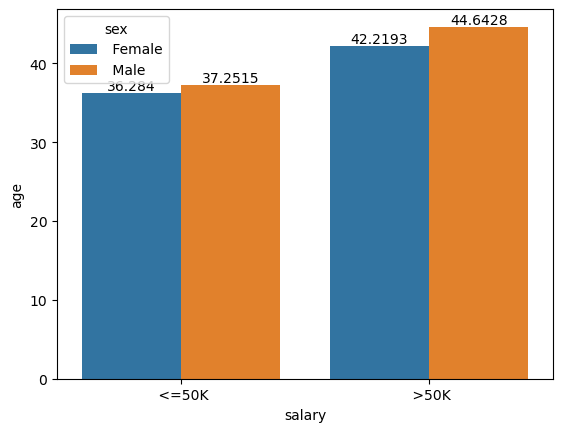

In [40]:
fig, ax = plt.subplots()

ax = sns.barplot(data=age, x="salary", y="age", hue="sex")

for container in ax.containers:
    ax.bar_label(container);

### 2. What is the workclass percentages of Americans in high-level income group?

In [41]:
workclass_US = df[(df.salary == " >50K") & (df['native-country-summary'] == "US")].workclass.value_counts(dropna = False, normalize = True) * 100
workclass_US

 Private             63.252899
 Self-emp-not-inc     9.165731
 Local-gov            8.099514
 Self-emp-inc         7.846988
 Federal-gov          4.732510
 State-gov            4.582866
NaN                   2.300786
 Without-pay          0.018706
Name: workclass, dtype: float64

([<matplotlib.patches.Wedge at 0x7fca7c190cd0>,
 [Text(-0.44486967643214986, 1.0060273211951822, ' Private'),
  Text(-0.4786027321318543, -0.9904238611806183, ' Self-emp-not-inc'),
  Text(0.10134392701527184, -1.0953216004704387, ' Local-gov'),
  Text(0.614951569620751, -0.9120496516204448, ' Self-emp-inc'),
  Text(0.9186813134701971, -0.6049997060170142, ' Federal-gov'),
  Text(1.054158569556669, -0.3142446661921846, ' State-gov'),
  Text(1.0970336136678516, -0.08072948954908042, 'nan'),
  Text(1.0999998101468191, -0.0006462793218057553, ' Without-pay')],
 [Text(-0.242656187144809, 0.5487421751973721, '63.3%'),
  Text(-0.2610560357082841, -0.5402311970076099, '9.2%'),
  Text(0.05527850564469373, -0.5974481457111483, '8.1%'),
  Text(0.335428128884046, -0.49748162815660624, '7.8%'),
  Text(0.501098898256471, -0.3299998396456441, '4.7%'),
  Text(0.5749955833945467, -0.1714061815593734, '4.6%'),
  Text(0.5983819710915553, -0.044034267026771136, '2.3%'),
  Text(0.5999998964437195, -0.00035

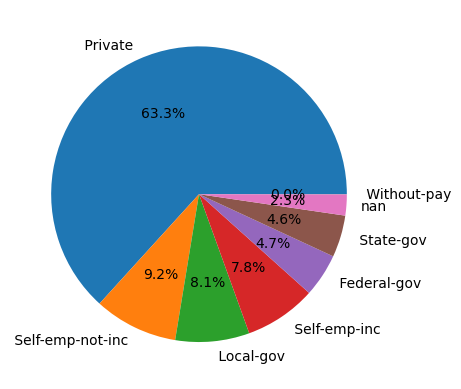

In [42]:
plt.pie(workclass_US, 
        labels=workclass_US.index,
        autopct="%.1f%%")


### 3. What is the occupation percentages of Americans who work as "Private" workclass in high-level income group?

In [43]:
Private_US = df[(df.workclass == " Private") & (df['native-country-summary'] == "US")].salary.value_counts(dropna = False, normalize = True) * 100
Private_US

 <=50K    77.550207
 >50K     22.449793
Name: salary, dtype: float64

([<matplotlib.patches.Wedge at 0x7fca6beff130>,
 [Text(-0.8375723677808423, 0.7130725970965325, ' <=50K'),
  Text(0.8375724011621788, -0.7130725578869395, ' >50K')],
 [Text(-0.45685765515318666, 0.3889486893253813, '77.6%'),
  Text(0.4568576733611883, -0.38894866793833055, '22.4%')])

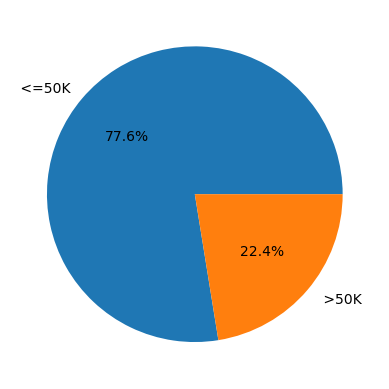

In [44]:
plt.pie(Private_US, 
        labels=Private_US.index,
        autopct="%.1f%%")

#### 4. What is the education level percentages of Asian-Pac-Islander race group in high-level income group?

In [45]:
Asian_Pac_Islander = df[(df.salary == " >50K") & (df.race == " Asian-Pac-Islander")].education.value_counts(dropna = False, normalize = True) * 100 
Asian_Pac_Islander

 Bachelors       34.474328
 Masters         15.892421
 Some-college    12.224939
 HS-grad         11.980440
 Prof-school      8.801956
 Doctorate        7.579462
 Assoc-voc        3.422983
 Assoc-acdm       3.178484
 5th-6th          1.222494
 11th             0.488998
 9th              0.244499
 10th             0.244499
 12th             0.244499
Name: education, dtype: float64

([<matplotlib.patches.Wedge at 0x7fca7bdd4b20>,
 [Text(0.5155067563608526, 0.9717267023944092, ' Bachelors'),
  Text(-0.977601544927056, 0.5042769272495357, ' Masters'),
  Text(-1.0100997863645464, -0.43554382280810483, ' Some-college'),
  Text(-0.4316617827167408, -1.0117648468600822, ' HS-grad'),
  Text(0.271757698930754, -1.0659023187290015, ' Prof-school'),
  Text(0.761214904264689, -0.7940729623437008, ' Doctorate'),
  Text(0.9852326537749447, -0.48919997744846644, ' Assoc-voc'),
  Text(1.0648505557794055, -0.27585012933890657, ' Assoc-acdm'),
  Text(1.0927067541798394, -0.12645927949249103, ' 5th-6th'),
  Text(1.0979238208137845, -0.06755208131257812, ' 11th'),
  Text(1.099188830529107, -0.04223641604177739, ' 9th'),
  Text(1.0997079518931416, -0.02534601631404266, ' 10th'),
  Text(1.0999675466430234, -0.008449635029308173, ' 12th')],
 [Text(0.28118550346955595, 0.5300327467605868, '34.5%'),
  Text(-0.5332372063238486, 0.2750601421361103, '15.9%'),
  Text(-0.5509635198352071, -0.

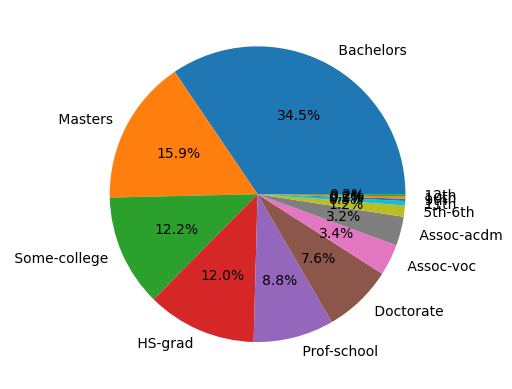

In [46]:
plt.pie(Asian_Pac_Islander, 
        labels=Asian_Pac_Islander.index,
        autopct="%.1f%%")

#### 5. What is the occupation percentages of Asian-Pac-Islander race group who has a Bachelors degree in high-level income group?

In [47]:
Asian_Pac_Islander = df[(df.salary == " >50K") & (df.race == " Asian-Pac-Islander") & (df.education == " Bachelors")]\
                     .occupation.value_counts(dropna = False, normalize = True) * 100 
Asian_Pac_Islander

 Prof-specialty       27.659574
 Exec-managerial      26.950355
 Adm-clerical         13.475177
 Sales                12.056738
 Other-service         6.382979
 Craft-repair          5.673759
 Tech-support          4.255319
 Protective-serv       1.418440
 Transport-moving      0.709220
 Machine-op-inspct     0.709220
 Farming-fishing       0.709220
Name: occupation, dtype: float64

([<matplotlib.patches.Wedge at 0x7fca6c129610>,
 [Text(0.7101907237296053, 0.8400173426355075, ' Prof-specialty'),
  Text(-0.9337175819397948, 0.5815251303052198, ' Exec-managerial'),
  Text(-0.8320538646809795, -0.7195042503484231, ' Adm-clerical'),
  Text(-0.06124090394507291, -1.0982939277279058, ' Sales'),
  Text(0.5499996358014774, -0.9526281544329048, ' Other-service'),
  Text(0.8632790589894519, -0.681725213198314, ' Craft-repair'),
  Text(1.0308390664726683, -0.3838890712611629, ' Tech-support'),
  Text(1.0825716570558654, -0.19503488749277142, ' Protective-serv'),
  Text(1.0931810366955135, -0.12229154103748459, ' Transport-moving'),
  Text(1.097543534825798, -0.07347237005904077, ' Machine-op-inspct'),
  Text(1.099726961999124, -0.02450732650000626, ' Farming-fishing')],
 [Text(0.3873767583979665, 0.45819127780118585, '27.7%'),
  Text(-0.509300499239888, 0.317195525621029, '27.0%'),
  Text(-0.45384756255326153, -0.3924568638264126, '13.5%'),
  Text(-0.03340412942458522, -0.59

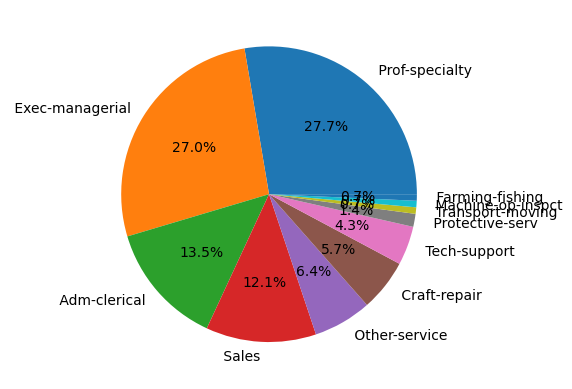

In [48]:
plt.pie(Asian_Pac_Islander, 
        labels=Asian_Pac_Islander.index,
        autopct="%.1f%%")

## Conclusion
- Data suggest High Education High Salary.
- Experiece brings high salary.
- if you are at high job role such as Exec-manager, you will get paid more.
- We have not seen any gender biases on salary.

# Feature Engineering

## Droping Uncessary Columns

In [49]:
df.drop(columns = ['marital-status','relationship','native-country'],inplace=True)

## Handling missing values

In [50]:
df.isna().sum()

age                          0
workclass                 2799
fnlwgt                       0
education                    0
education-num                0
occupation                2809
race                         0
sex                          0
capital-gain                 0
capital-loss                 0
hours-per-week               0
salary                       0
native-country-summary       0
marital-status-summary       0
dtype: int64

#### Since both workclass and occupation are categorical feature, we'll try to impute it with mode. 

In [51]:
df = df.fillna(df.mode().iloc(0))

In [52]:
df.isna().sum()

age                       0
workclass                 0
fnlwgt                    0
education                 0
education-num             0
occupation                0
race                      0
sex                       0
capital-gain              0
capital-loss              0
hours-per-week            0
salary                    0
native-country-summary    0
marital-status-summary    0
dtype: int64

## Handling Outliers

### Interquartile Range Method( IQR ) method

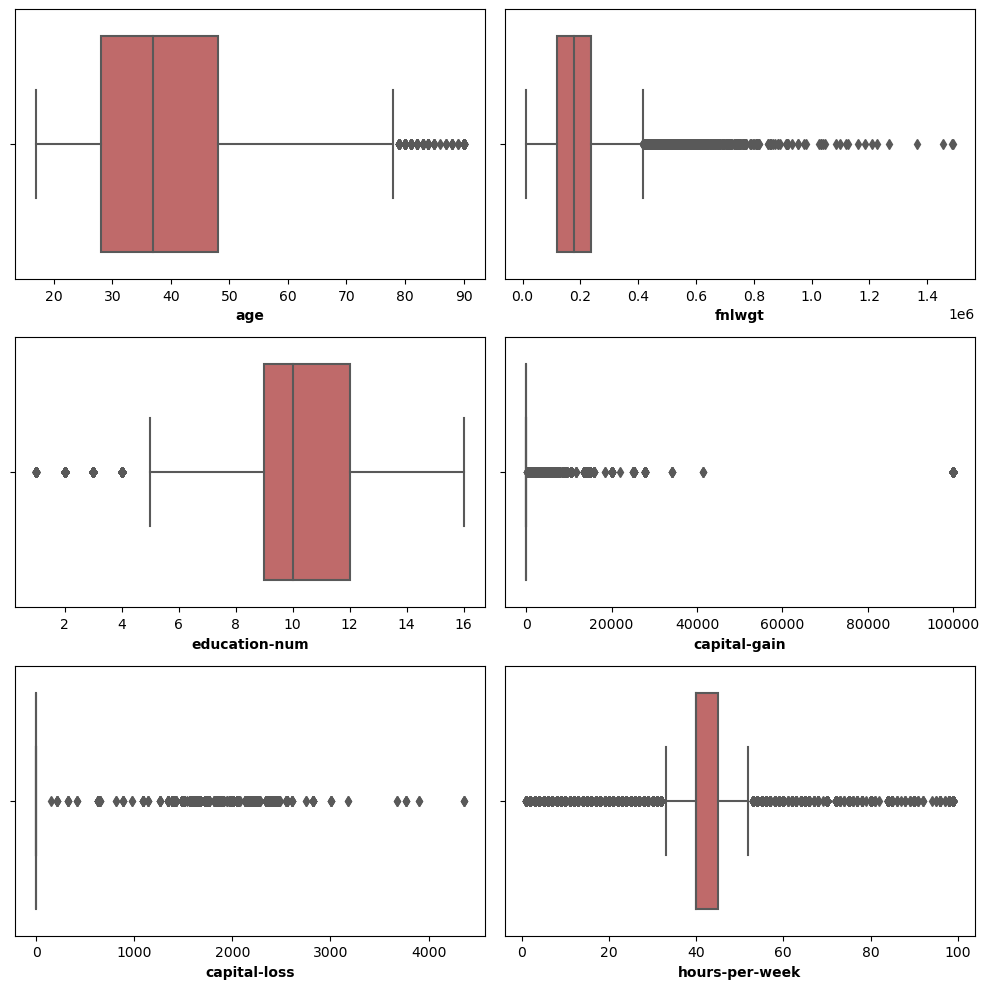

In [53]:
plt.figure(figsize=(10, 10))
for i, col in enumerate(numeric_features):
    plt.subplot(3, 2, i+1)
    sns.boxplot(x=df[col], color='indianred')
    plt.xlabel(col, weight='bold')
    plt.tight_layout()

In [54]:
df1 = df.copy()
def remove_outliers_IQR(col):
    # Finding the IQR
    percentile25 = df1[col].quantile(0.25)
    percentile75 = df1[col].quantile(0.75)
    iqr = percentile75 - percentile25
    upper_limit = percentile75 + 1.5 * iqr
    lower_limit = percentile25 - 1.5 * iqr
    df1[col] = np.where(df1[col]>upper_limit, upper_limit, np.where(df1[col]<lower_limit,lower_limit,df1[col]))
    return df1[df1[col] > upper_limit]

In [55]:
for col in numeric_features:
    remove_outliers_IQR(col)

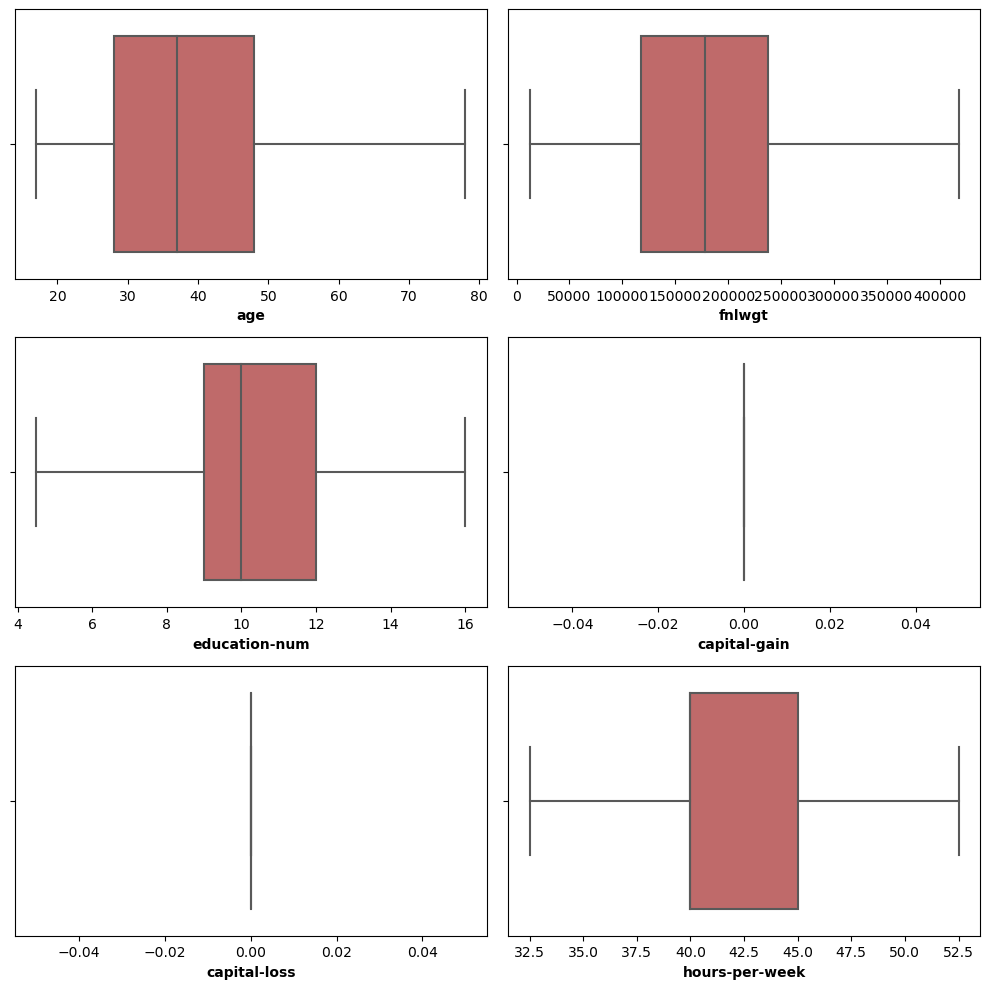

In [56]:
plt.figure(figsize=(10, 10))
for i, col in enumerate(numeric_features):
    plt.subplot(3, 2, i+1)
    sns.boxplot(x=df1[col], color='indianred')
    plt.xlabel(col, weight='bold')
    plt.tight_layout()

In [57]:
df = df1.copy()

## Checking normal distribution

### QQ-plot

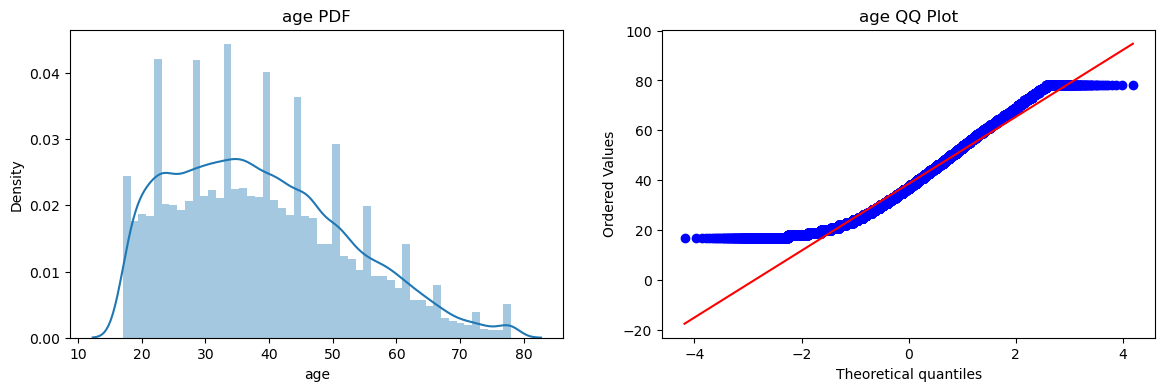

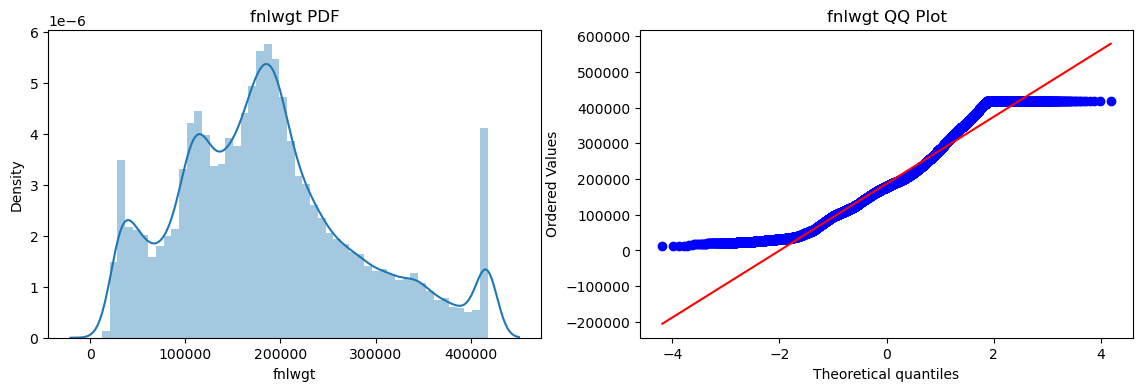

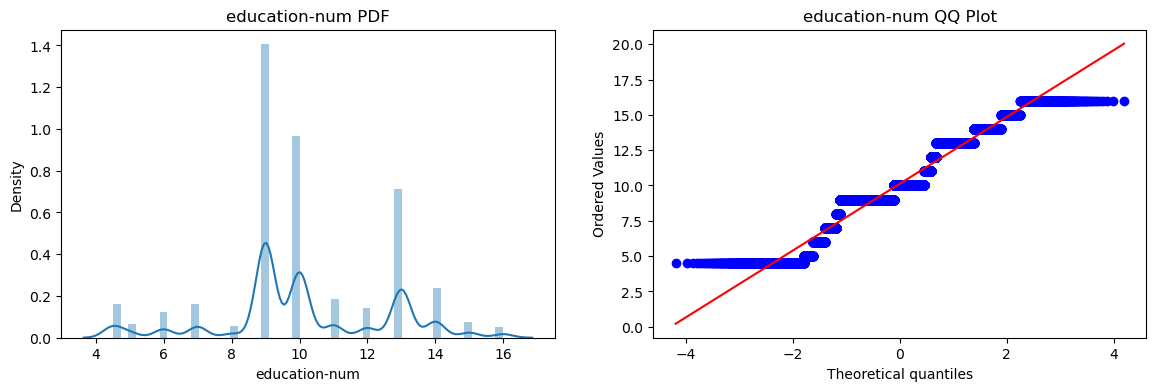

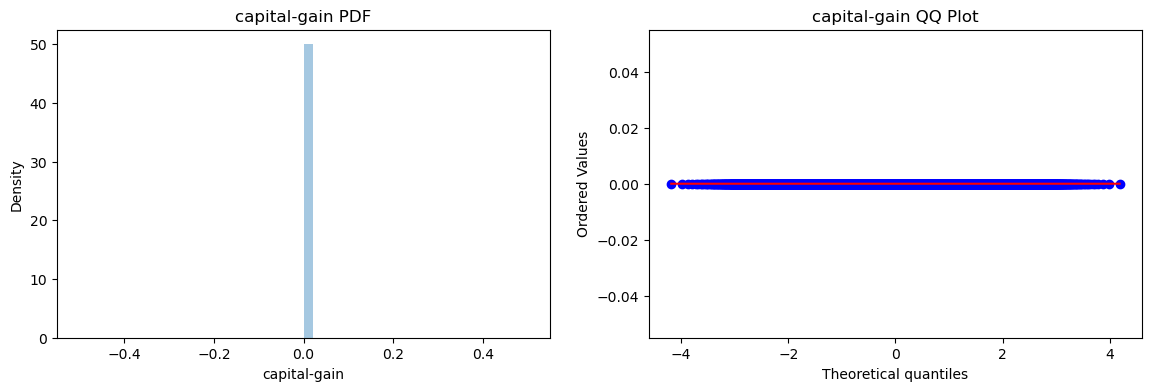

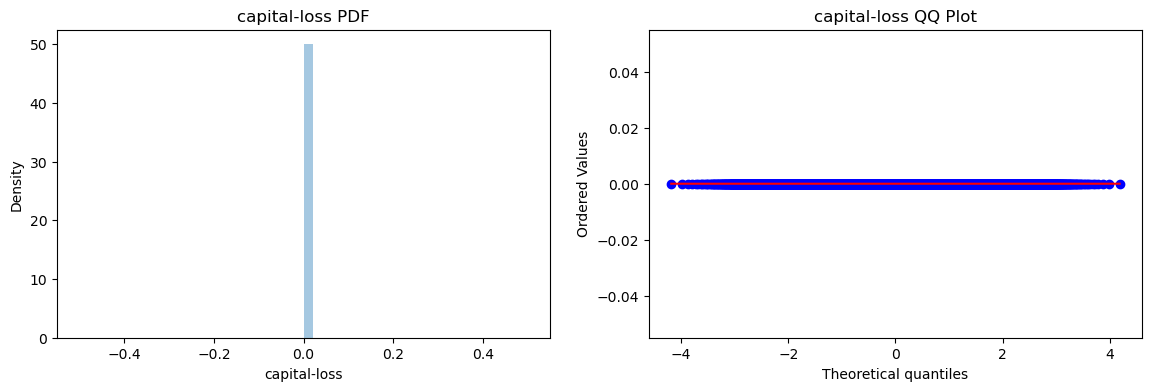

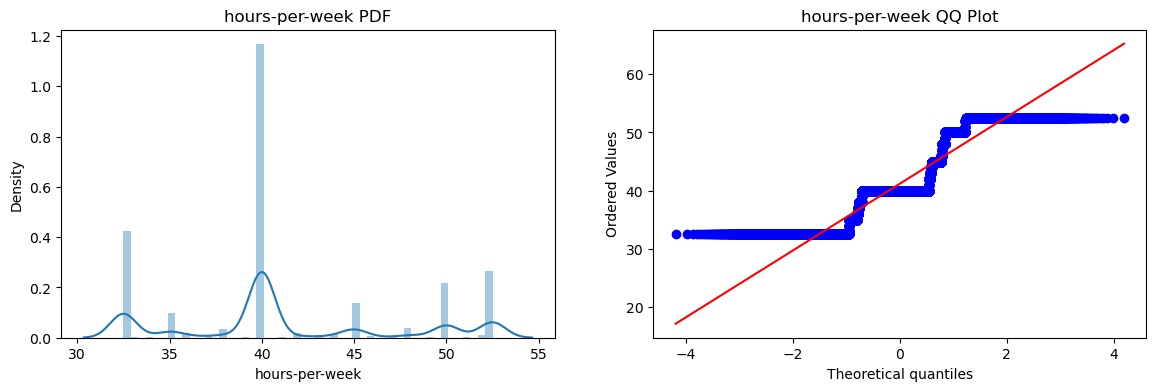

In [58]:
from scipy import stats
def plot_qq_plot(column):
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    sns.distplot(df[column])
    plt.title("{} PDF".format(column))
    plt.subplot(122)
    stats.probplot(df[column], dist="norm", plot=plt)
    plt.title('{} QQ Plot'.format(column))
    plt.show()
for col in numeric_features:
    plot_qq_plot(col)

#### Report
- Some features are not normally distributed.

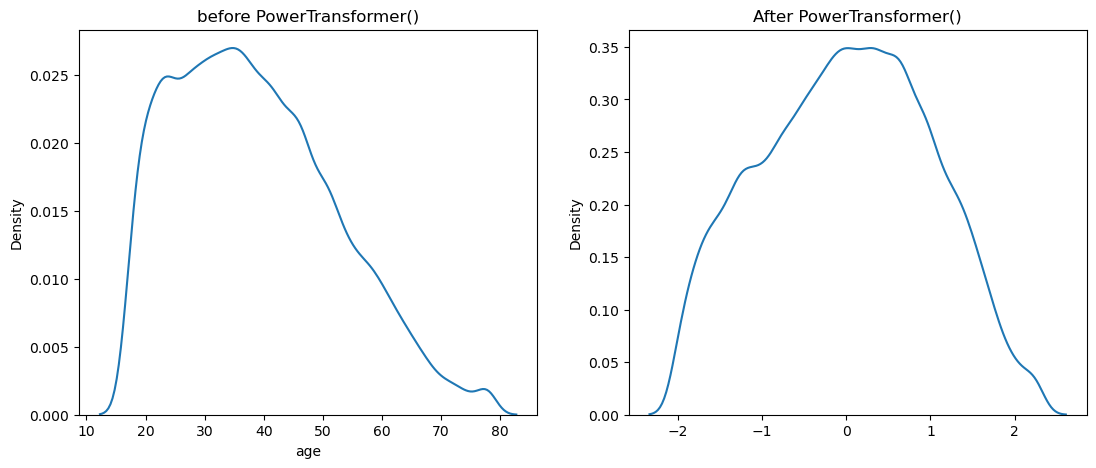

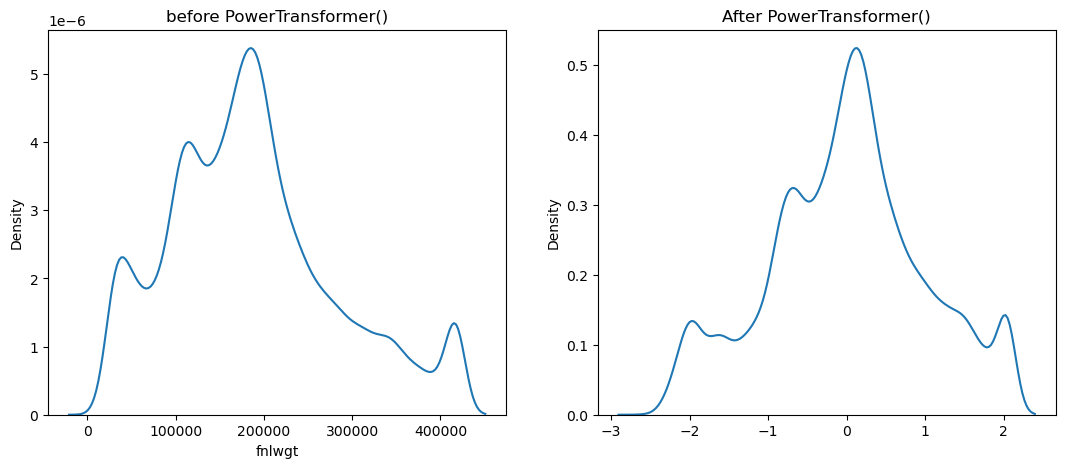

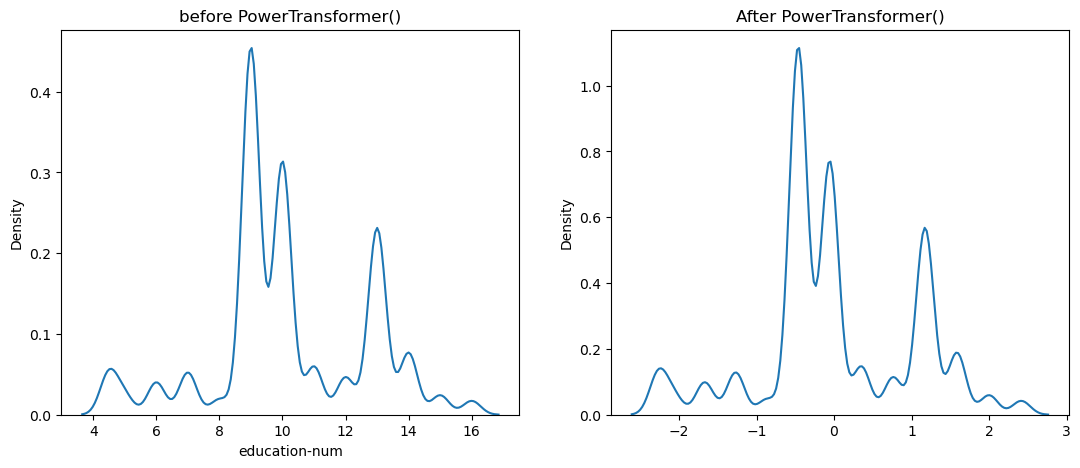

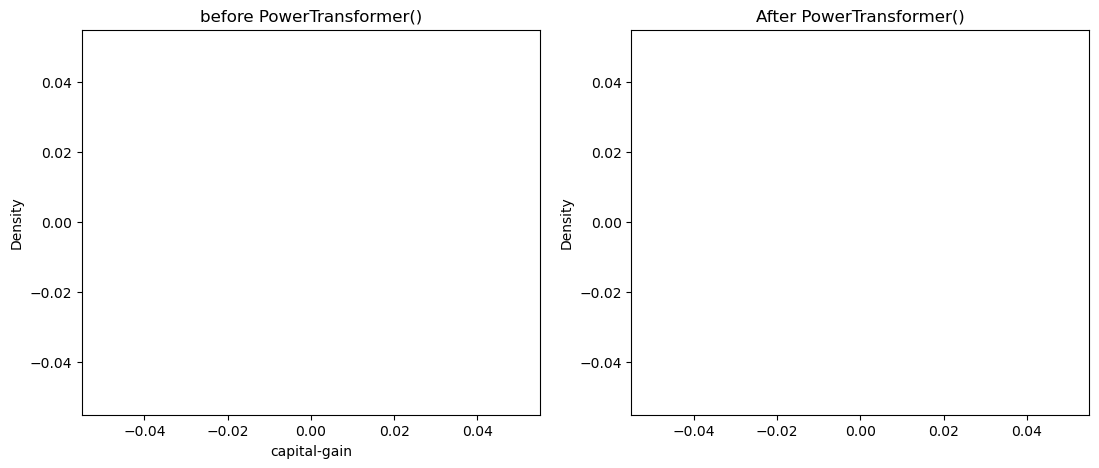

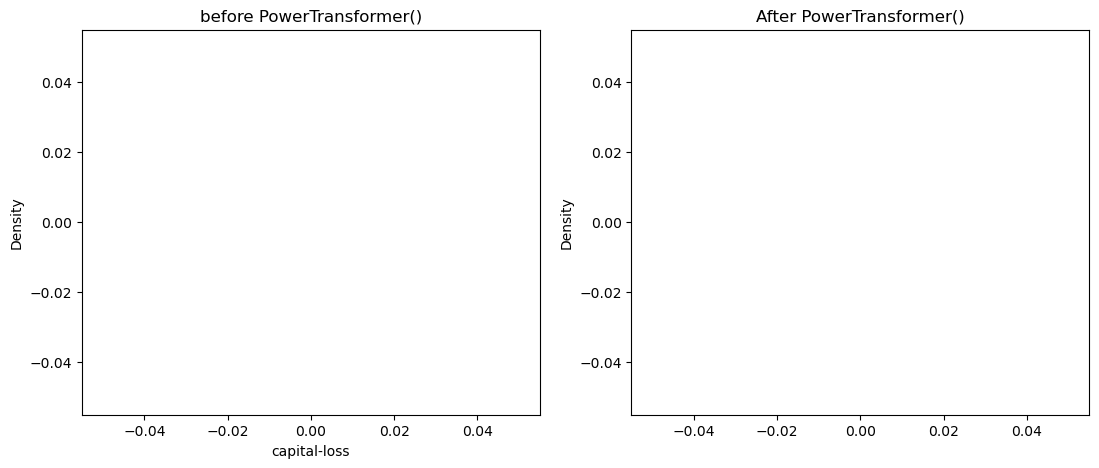

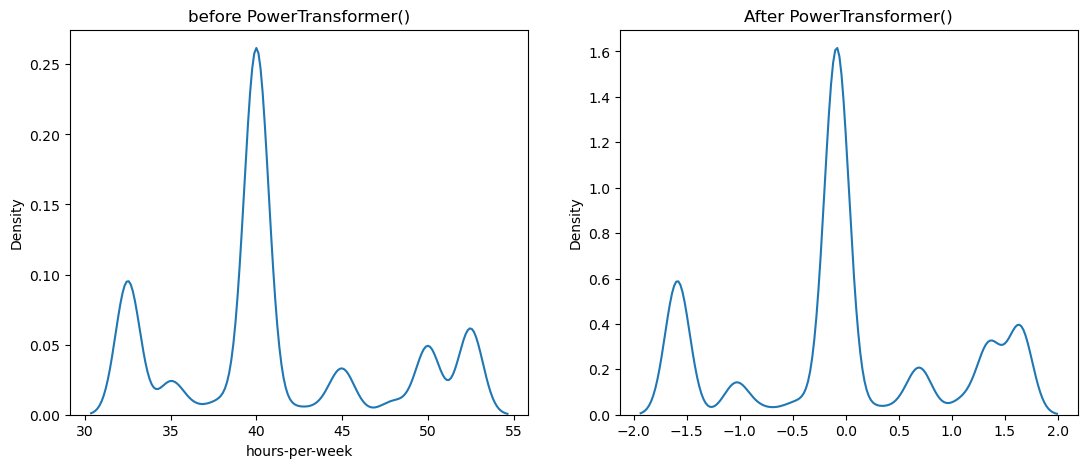

In [59]:
from sklearn.preprocessing import PowerTransformer
def power_plots(df,var,t):
    plt.figure(figsize=(13,5))
    plt.subplot(121)
    sns.kdeplot(df[var])
    plt.title('before ' + str(t))
    plt.subplot(122)
    p1 = t.fit_transform(df[[var]]).flatten()
    sns.kdeplot(p1)
    plt.title('After ' + str(t))
for col in numeric_features:
    power_plots(df,col,PowerTransformer())

In [60]:
data=pd.get_dummies(df,drop_first=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48813 entries, 0 to 48841
Data columns (total 51 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            48813 non-null  float64
 1   fnlwgt                         48813 non-null  float64
 2   education-num                  48813 non-null  float64
 3   capital-gain                   48813 non-null  float64
 4   capital-loss                   48813 non-null  float64
 5   hours-per-week                 48813 non-null  float64
 6   workclass_ Federal-gov         48813 non-null  uint8  
 7   workclass_ Local-gov           48813 non-null  uint8  
 8   workclass_ Never-worked        48813 non-null  uint8  
 9   workclass_ Private             48813 non-null  uint8  
 10  workclass_ Self-emp-inc        48813 non-null  uint8  
 11  workclass_ Self-emp-not-inc    48813 non-null  uint8  
 12  workclass_ State-gov           48813 non-null 

In [61]:
X = data.drop('salary_ >50K',axis=1)
y = data['salary_ >50K']

## Handling Imbalance Data

In [62]:
from imblearn.combine import SMOTETomek

# Resampling the minority class. The strategy can be changed as required.
smt = SMOTETomek(random_state=42,sampling_strategy='minority',n_jobs=-1)
# Fit the model to generate the data.
X_res, y_res = smt.fit_resample(X, y)

# Model Training

In [63]:
def evaluate_clf(true, predicted):
    '''
    This function takes in true values and predicted values
    Returns: Accuracy, F1-Score, Precision, Recall, Roc-auc Score
    '''
    acc = accuracy_score(true, predicted) # Calculate Accuracy
    f1 = f1_score(true, predicted) # Calculate F1-score
    precision = precision_score(true, predicted) # Calculate Precision
    recall = recall_score(true, predicted)  # Calculate Recall
    roc_auc = roc_auc_score(true, predicted) #Calculate Roc
    return acc, f1 , precision, recall, roc_auc

In [64]:
# Create a function which can evaluate models and return a report 
def evaluate_models(X, y, models):
    '''
    This function takes in X and y and models dictionary as input
    It splits the data into Train Test split
    Iterates through the given model dictionary and evaluates the metrics
    Returns: Dataframe which contains report of all models metrics with cost
    '''
    # separate dataset into train and test
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
    
    cost_list=[]
    models_list = []
    accuracy_list = []
    
    for i in range(len(list(models))):
        model = list(models.values())[i]
        model.fit(X_train, y_train) # Train model

        # Make predictions
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)

        # Training set performance
        model_train_accuracy, model_train_f1,model_train_precision,\
        model_train_recall,model_train_rocauc_score=evaluate_clf(y_train ,y_train_pred)


        # Test set performance
        model_test_accuracy,model_test_f1,model_test_precision,\
        model_test_recall,model_test_rocauc_score=evaluate_clf(y_test, y_test_pred)

        print(list(models.keys())[i])
        models_list.append(list(models.keys())[i])
        print('Model performance for Training set')
        print("- Accuracy: {:.4f}".format(model_train_accuracy))
        print('- F1 score: {:.4f}'.format(model_train_f1)) 
        print('- Precision: {:.4f}'.format(model_train_precision))
        print('- Recall: {:.4f}'.format(model_train_recall))
        print('- Roc Auc Score: {:.4f}'.format(model_train_rocauc_score))

        print('----------------------------------')

        print('Model performance for Test set')
        print('- Accuracy: {:.4f}'.format(model_test_accuracy))
        print('- F1 score: {:.4f}'.format(model_test_f1))
        print('- Precision: {:.4f}'.format(model_test_precision))
        print('- Recall: {:.4f}'.format(model_test_recall))
        print('- Roc Auc Score: {:.4f}'.format(model_test_rocauc_score))
        print('='*35)
        print('\n')

In [65]:
# Dictionary which contains models for experiment
models = {
    "Random Forest": RandomForestClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Logistic Regression": LogisticRegression(),
     "K-Neighbors Classifier": KNeighborsClassifier(),
    "XGBClassifier": XGBClassifier(), 
     "CatBoosting Classifier": CatBoostClassifier(verbose=False),
    "AdaBoost Classifier": AdaBoostClassifier()
}

In [66]:
evaluate_models(X_res, y_res, models)

Random Forest
Model performance for Training set
- Accuracy: 0.9998
- F1 score: 0.9998
- Precision: 0.9998
- Recall: 0.9999
- Roc Auc Score: 0.9998
----------------------------------
Model performance for Test set
- Accuracy: 0.8926
- F1 score: 0.8927
- Precision: 0.8956
- Recall: 0.8898
- Roc Auc Score: 0.8926


Decision Tree
Model performance for Training set
- Accuracy: 0.9999
- F1 score: 0.9999
- Precision: 1.0000
- Recall: 0.9997
- Roc Auc Score: 0.9999
----------------------------------
Model performance for Test set
- Accuracy: 0.8636
- F1 score: 0.8655
- Precision: 0.8571
- Recall: 0.8740
- Roc Auc Score: 0.8636


Gradient Boosting
Model performance for Training set
- Accuracy: 0.8944
- F1 score: 0.8948
- Precision: 0.8908
- Recall: 0.8988
- Roc Auc Score: 0.8944
----------------------------------
Model performance for Test set
- Accuracy: 0.8926
- F1 score: 0.8941
- Precision: 0.8851
- Recall: 0.9033
- Roc Auc Score: 0.8926


Logistic Regression
Model performance for Training 

In [67]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.20, random_state=1)

In [68]:
xgb_model = XGBClassifier(
    objective= 'binary:logistic',
    nthread=4,
    seed=42
)

#brute force scan for all parameters, here are the tricks
#usually max_depth is 6,7,8
#learning rate is around 0.05, but small changes may make big diff
#tuning min_child_weight subsample colsample_bytree can have 
#much fun of fighting against overfit 
#n_estimators is how many round of boosting
#finally, ensemble xgboost with multiple seeds may reduce variance
parameters = {
    'max_depth': [6],
    'n_estimators': [5000],
    'learning_rate': [0.05]
}
skf=StratifiedKFold(n_splits=5,  shuffle=True)
clf = GridSearchCV(xgb_model, parameters, n_jobs=10, 
                   cv=skf.get_n_splits(y_train), 
                   scoring='roc_auc',
                   verbose=True, refit=True)

clf.fit(X_train, y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     gamma=None, gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_ca...hot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None, nthread=4,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, reg_alpha=None, ...),
             n_jobs=10,
             param_grid={'learning_rate': [0.05], 'max_depth': [6],
                         'n_estimators': [5000]},
             scoring='roc_auc', verbose=True)

In [69]:
clf.best_params_

{'learning_rate': 0.05, 'max_depth': 6, 'n_estimators': 5000}

In [70]:
final_model=clf.best_estimator_
y_pred = final_model.predict(X_test)

In [76]:
model_test_accuracy,model_test_f1,model_test_precision,model_test_recall,model_test_rocauc_score=evaluate_clf(y_test, y_pred)

In [77]:
print('Model performance for Test set')
print('- Accuracy: {:.4f}'.format(model_test_accuracy))
print('- F1 score: {:.4f}'.format(model_test_f1))
print('- Precision: {:.4f}'.format(model_test_precision))
print('- Recall: {:.4f}'.format(model_test_recall))
print('- Roc Auc Score: {:.4f}'.format(model_test_rocauc_score))

Model performance for Test set
- Accuracy: 0.9010
- F1 score: 0.8999
- Precision: 0.9086
- Recall: 0.8913
- Roc Auc Score: 0.9010


In [73]:
#Saving the model
import pickle
with open('../artifacts/model.pkl', 'wb') as files:
    pickle.dump(final_model, files)